<a href="https://colab.research.google.com/github/Tarshit/19CSE305-MachineLearning/blob/main/Pash2_ML_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data and Importing Libraries** 

In [ ]:
pip install transformers

In [ ]:

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier


from transformers import pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/ML_Casestudy/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv.zip", low_memory=False)
df.head()

id  ...                                         sourceURLs
0  AVqVGZNvQMlgsOJE6eUY  ...  https://www.newegg.com/Product/Product.aspx%25...
1  AVqVGZNvQMlgsOJE6eUY  ...  https://www.newegg.com/Product/Product.aspx%25...
2  AVqVGZNvQMlgsOJE6eUY  ...  https://www.newegg.com/Product/Product.aspx%25...
3  AVqVGZNvQMlgsOJE6eUY  ...  https://www.newegg.com/Product/Product.aspx%25...
4  AVqVGZNvQMlgsOJE6eUY  ...  https://www.newegg.com/Product/Product.aspx%25...

[5 rows x 24 columns]

In [ ]:
df.shape

(5000, 24)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML_Casestudy/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip', low_memory=False)

In [ ]:
df2.shape

(28332, 24)

In [ ]:
data = pd.concat([df, df2], ignore_index=True)
data.shape

(33332, 25)

# **EDA**

In [ ]:
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'reviews.didPurchase'],
      dtype='object')

In [ ]:
data.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateAdded       object
reviews.dateSeen        object
reviews.doRecommend     object
reviews.id             float64
reviews.numHelpful     float64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
reviews.didPurchase     object
dtype: object

In [ ]:
data.head()

id  ... reviews.didPurchase
0  AVqVGZNvQMlgsOJE6eUY  ...                 NaN
1  AVqVGZNvQMlgsOJE6eUY  ...                 NaN
2  AVqVGZNvQMlgsOJE6eUY  ...                 NaN
3  AVqVGZNvQMlgsOJE6eUY  ...                 NaN
4  AVqVGZNvQMlgsOJE6eUY  ...                 NaN

[5 rows x 25 columns]

In [ ]:
data.tail()

id  ... reviews.didPurchase
33327  AVqkIhxunnc1JgDc3kg_  ...                 NaN
33328  AVqkIhxunnc1JgDc3kg_  ...                 NaN
33329  AVqkIhxunnc1JgDc3kg_  ...                 NaN
33330  AVqkIhxunnc1JgDc3kg_  ...                 NaN
33331  AVqkIhxunnc1JgDc3kg_  ...                 NaN

[5 rows x 25 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33332 entries, 0 to 33331
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33332 non-null  object 
 1   dateAdded            33332 non-null  object 
 2   dateUpdated          33332 non-null  object 
 3   name                 33332 non-null  object 
 4   asins                33332 non-null  object 
 5   brand                33332 non-null  object 
 6   categories           33332 non-null  object 
 7   primaryCategories    33332 non-null  object 
 8   imageURLs            33332 non-null  object 
 9   keys                 33332 non-null  object 
 10  manufacturer         33332 non-null  object 
 11  manufacturerNumber   33332 non-null  object 
 12  reviews.date         33332 non-null  object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     33332 non-null  object 
 15  reviews.doRecommend  21086 non-null 

In [ ]:
data.describe()

reviews.id  reviews.numHelpful  reviews.rating
count  7.000000e+01        21115.000000    33332.000000
mean   1.847802e+08            0.477954        4.526461
std    2.221998e+07            8.303597        0.907859
min    1.082112e+08            0.000000        1.000000
25%    1.845218e+08            0.000000        4.000000
50%    1.881057e+08            0.000000        5.000000
75%    1.987643e+08            0.000000        5.000000
max    2.085304e+08          621.000000        5.000000

In [ ]:
data.head().isnull()

id  dateAdded  ...  sourceURLs  reviews.didPurchase
0  False      False  ...       False                 True
1  False      False  ...       False                 True
2  False      False  ...       False                 True
3  False      False  ...       False                 True
4  False      False  ...       False                 True

[5 rows x 25 columns]

In [ ]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateAdded      32280
reviews.dateSeen           0
reviews.doRecommend    12246
reviews.id             33262
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             13
reviews.username           0
sourceURLs                 0
reviews.didPurchase    33323
dtype: int64

In [ ]:
data['id'].value_counts()

AVpgNzjwLJeJML43Kpxn    8343
AVpe7xlELJeJML43ypLz    3728
AVqkIhxunnc1JgDc3kg_    2443
AVqVGWQDv8e3D1O-ldFr    2370
AVph0EeEilAPnD_x9myq    1986
                        ... 
AVzvV7FHglJLPUi8GzhD       1
AVzoFq6UvKc47QAVe9NB       1
AV2ElNnuvKc47QAVouhY       1
AVpe5Q3sLJeJML43xt5X       1
AVpiZQ8r1cnluZ0-M3MN       1
Name: id, Length: 69, dtype: int64

In [ ]:
data['id'].unique()

array(['AVqVGZNvQMlgsOJE6eUY', 'AWFUWc8THh53nbDRF6YO',
       'AWK8z0pOIwln0LfXlSxH', 'AV-XeQLWuC1rwyj_gbP5',
       'AWMjT0WguC1rwyj_rFh3', 'AVpfIfGA1cnluZ0-emyp',
       'AVph0EeEilAPnD_x9myq', 'AVqVGZSEQMlgsOJE6eUc',
       'AVpgdkC8ilAPnD_xsvyi', 'AVqVGWLKnnc1JgDc3jF1',
       'AVqkIhkhv8e3D1O-lebZ', 'AVqkIh9HQMlgsOJE6fu_',
       'AVpfpK8KLJeJML43BCuD', 'AVpidLjVilAPnD_xEVpI',
       'AVqVGZO3nnc1JgDc3jGK', 'AVphPmHuilAPnD_x3E5h',
       'AVqkIhwDv8e3D1O-lebb', 'AVpjEN4jLJeJML43rpUe',
       'AVpftoij1cnluZ0-p5n2', 'AVqkIj9snnc1JgDc3khU',
       'AVqVGZN9QMlgsOJE6eUZ', 'AVqkIh8WQMlgsOJE6fu-',
       'AVqkIiKWnnc1JgDc3khH', 'AVqkIdZiv8e3D1O-leaJ',
       'AVpgNzjwLJeJML43Kpxn', 'AVpe7nGV1cnluZ0-aG2o',
       'AVpfl8cLLJeJML43AE3S', 'AWYAV-i9Iwln0LfXqrUq',
       'AWFFfd9KIwln0LfXiOe0', 'AVpe7xlELJeJML43ypLz',
       'AVphC37X1cnluZ0-9mbp', 'AVpf68A5ilAPnD_xkjSq',
       'AVpe6nyKLJeJML43yOe2', 'AVpflnS7ilAPnD_xehxE',
       'AVpfzuRNilAPnD_xipqB', 'AVpfhcniLJeJML43-t4G',
       'AW

In [ ]:
data['dateAdded'].value_counts()

2015-10-30T08:59:32Z    8343
2017-03-03T16:55:53Z    3799
2015-12-03T01:23:41Z    3728
2017-01-11T06:58:33Z    3662
2017-03-06T14:59:43Z    3240
2016-06-08T03:50:06Z    1454
2016-04-10T22:00:34Z    1395
2017-06-24T05:30:23Z    1013
2017-03-06T14:59:25Z     846
2017-01-04T03:51:17Z     826
2018-02-02T02:30:22Z     650
2018-05-02T14:01:51Z     590
2016-03-31T21:08:24Z     587
2017-03-06T14:59:44Z     579
2017-05-20T01:34:04Z     526
2017-03-03T16:56:06Z     446
2017-03-03T16:56:05Z     347
2017-03-06T14:59:52Z     209
2016-08-01T02:44:31Z     205
2018-04-13T02:03:15Z     196
2017-06-22T02:09:02Z     160
2017-03-06T14:59:42Z     118
2017-06-24T05:30:24Z      82
2015-12-09T08:57:06Z      61
2015-12-02T05:30:10Z      58
2017-11-03T23:17:55Z      26
2015-05-11T12:33:03Z      25
2015-01-22T12:25:23Z      21
2017-06-28T15:41:38Z      13
2015-12-01T05:29:38Z      12
2015-11-06T02:16:04Z       9
2015-10-30T10:58:06Z       9
2018-11-24T02:10:04Z       7
2018-06-13T19:37:34Z       7
2014-08-28T19:

In [ ]:
data['dateUpdated'].value_counts()

2019-04-25T09:08:16Z    8343
2019-03-09T07:13:43Z    4301
2019-04-24T02:17:42Z    3728
2019-02-23T02:49:38Z    2443
2019-02-25T02:23:15Z    1569
                        ... 
2019-03-09T07:21:48Z       1
2019-03-26T16:55:27Z       1
2019-02-25T02:20:02Z       1
2019-04-18T09:31:54Z       1
2019-02-25T02:34:23Z       1
Name: dateUpdated, Length: 69, dtype: int64

In [ ]:
data['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                   1986
                                                                                         ... 
Amazon Echo Show - Black                                                                    1
AmazonBasics Silicone Hot Handle Cover/Holder - Red                                         1
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"             1
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity                             1
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42

In [ ]:
data['name'].unique()

array(['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
       'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
       'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
       'Amazon - Echo Plus w/ Built-In Hub - Silver',
       'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
       'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
       'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
       'Amazon Tap - Alexa-Enabled Portable Bluetooth Spe

In [ ]:
data['asins'].value_counts()

B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y22C2Y                          1986
                                    ... 
B00OP6SMCI                             1
B00VKTZFB4                             1
B00QAVO43C                             1
B010RLCH2U                             1
B01L7XWEQQ                             1
Name: asins, Length: 70, dtype: int64

In [ ]:
data['asins'].unique()

array(['B00ZV9PXP2', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM',
       'B06XB29FPF', 'B00QFQRELG', 'B018Y22C2Y', 'B017JG41PC',
       'B018Y22BI4', 'B018Y23MNM', 'B01AHBBG04', 'B01AHBDCKQ',
       'B01BH83OOM', 'B0189XYY0Q', 'B00VINDBJK', 'B00IOY8XWQ',
       'B01AHB9CN2', 'B018Y225IA', 'B00IOYAM4I', 'B01AHB9C1E',
       'B00REQKWGA', 'B01ACEKAJY', 'B01AHB9CYG', 'B018Y224PY',
       'B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0',
       'B01E6AO69U,B00L9EPT8O', 'B073SQYXTW', 'B00ZV9RDKK',
       'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0',
       'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM',
       'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU',
       'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB',
       'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4', 'B00Y3QOH5G',
       'B00NH144GK,B00LA9H1E8', 'B00OP6SMCI', 'B00BGIQS1A', 'B006LW0W5Y',
       'B0751RGYJV', 'B010RLCH2U', 'B01GAGYVU2', 'B0752151W6',
       'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01IO618J8',
      

In [ ]:
data['brand'].value_counts()

Amazon          21153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [ ]:
data['primaryCategories'].value_counts()

Electronics                    17271
Health & Beauty                12071
Toys & Games,Electronics        1676
Electronics,Hardware            1435
Office Supplies,Electronics      651
Electronics,Media                209
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [ ]:
data['manufacturer'].value_counts()

Amazon                     21130
AmazonBasics               12179
Amazon Digital Services       18
Amazon.com                     5
Name: manufacturer, dtype: int64

In [ ]:
data['reviews.doRecommend'].value_counts()

True     20118
False      968
Name: reviews.doRecommend, dtype: int64

In [ ]:
data['manufacturerNumber'].value_counts()

HL-002619           8343
LR6G0748FFPAB-US    3728
53-004484           3167
53-004485           2443
53-004755           1986
                    ... 
6009-S                 1
53-003736              1
AOKE-16082501          1
DHCD002                1
9001-42A               1
Name: manufacturerNumber, Length: 74, dtype: int64

In [ ]:
data['reviews.date'].value_counts()

2017-01-23T00:00:00.000Z    657
2017-01-06T00:00:00.000Z    631
2017-01-18T00:00:00.000Z    545
2017-01-16T00:00:00.000Z    537
2016-12-23T00:00:00.000Z    449
                           ... 
2018-02-14T00:00:00.000Z      1
2016-11-23T03:38:24.000Z      1
2017-10-30T00:00:00.000Z      1
2015-02-12T00:00:00.000Z      1
2018-08-16T00:00:00.000Z      1
Name: reviews.date, Length: 1355, dtype: int64

In [ ]:
data['reviews.dateSeen'].value_counts()

2017-08-28T00:00:00Z                                                                                                                                                                            8343
2017-06-28T00:00:00Z                                                                                                                                                                            3728
2017-04-30T00:00:00Z,2017-06-07T00:00:00Z                                                                                                                                                       2950
2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017-04-26T00:00:00Z,2017-08-06T00:00:00Z,2017-05-10T00:00:00Z,2017-08-09T00:00:00Z                                                                   1650
2017-04-26T00:00:00Z,2017-06-04T00:00:00Z,2017-06-03T00:00:00Z                                                                                                                                  1492
               

In [ ]:
data['reviews.rating'].unique()

array([3, 5, 4, 1, 2])

In [ ]:
data.rename(columns={'reviews.rating': 'rating', 'reviews.doRecommend': 'doRecommend', 'reviews.numHelpful': 'numHelpful'}, inplace=True)

In [ ]:
pd.crosstab(data.doRecommend, data.primaryCategories,values=data.numHelpful,aggfunc=np.average)

primaryCategories  Electronics  ...  Toys & Games,Electronics
doRecommend                     ...                          
False                 0.565891  ...                  0.468750
True                  0.312749  ...                  0.096835

[2 rows x 6 columns]

In [ ]:
data.corr()

reviews.id  numHelpful    rating
reviews.id    1.000000   -0.545113  0.330520
numHelpful   -0.545113    1.000000 -0.041512
rating        0.330520   -0.041512  1.000000

In [ ]:
np.var(data)

doRecommend            4.379976e-02
reviews.id             4.866745e+14
numHelpful             6.894646e+01
rating                 8.241828e-01
reviews.didPurchase    9.876543e-02
dtype: float64

In [ ]:
np.std(data)

doRecommend            2.092839e-01
reviews.id             2.206070e+07
numHelpful             8.303400e+00
rating                 9.078451e-01
reviews.didPurchase    3.142697e-01
dtype: float64

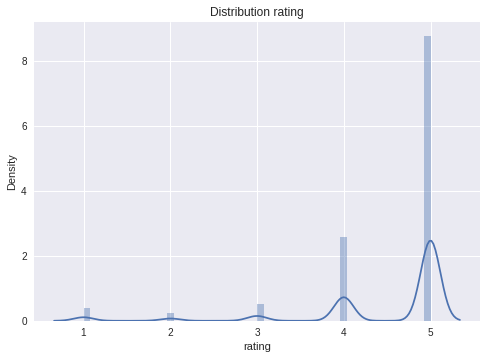

In [ ]:
sns.distplot(data.rating)
plt.title("Distribution rating")
plt.show()

In [ ]:
g1 = data.groupby('brand')

In [ ]:
g1. describe()

reviews.id                             ... rating          
                  count         mean           std  ...    50%  75%  max
brand                                               ...                 
Amazon             70.0  184780236.0  2.221998e+07  ...    5.0  5.0  5.0
AmazonBasics        0.0          NaN           NaN  ...    4.0  5.0  5.0
Amazonbasics        0.0          NaN           NaN  ...    5.0  5.0  5.0

[3 rows x 24 columns]

In [ ]:
g1.rating.mean()

brand
Amazon          4.570699
AmazonBasics    4.300000
Amazonbasics    4.449749
Name: rating, dtype: float64

In [ ]:
data.skew(axis = 0, skipna = True)

doRecommend            -4.339799
reviews.id             -1.999438
numHelpful             49.183322
rating                 -2.381658
reviews.didPurchase    -3.000000
dtype: float64

In [ ]:
data.kurt(axis = 0, skipna = True)

doRecommend              16.835450
reviews.id                3.667570
numHelpful             2931.976910
rating                    5.639944
reviews.didPurchase       9.000000
dtype: float64

# **Preprocessing**

In [ ]:
data.head(3)

id  ... reviews.didPurchase
0  AVqVGZNvQMlgsOJE6eUY  ...                 NaN
1  AVqVGZNvQMlgsOJE6eUY  ...                 NaN
2  AVqVGZNvQMlgsOJE6eUY  ...                 NaN

[3 rows x 25 columns]

In [ ]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateAdded      32280
reviews.dateSeen           0
doRecommend            12246
reviews.id             33262
numHelpful             12217
rating                     0
reviews.sourceURLs         0
reviews.text               0
reviews.title             13
reviews.username           0
sourceURLs                 0
reviews.didPurchase    33323
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33332 entries, 0 to 33331
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33332 non-null  object 
 1   dateAdded            33332 non-null  object 
 2   dateUpdated          33332 non-null  object 
 3   name                 33332 non-null  object 
 4   asins                33332 non-null  object 
 5   brand                33332 non-null  object 
 6   categories           33332 non-null  object 
 7   primaryCategories    33332 non-null  object 
 8   imageURLs            33332 non-null  object 
 9   keys                 33332 non-null  object 
 10  manufacturer         33332 non-null  object 
 11  manufacturerNumber   33332 non-null  object 
 12  reviews.date         33332 non-null  object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     33332 non-null  object 
 15  doRecommend          21086 non-null 

In [ ]:
data.drop('reviews.didPurchase', inplace=True, axis=1)

In [ ]:
data.drop('keys', inplace=True, axis=1)

In [ ]:
data.drop('reviews.dateAdded', inplace=True, axis=1)

In [ ]:
data.drop('categories', inplace=True, axis=1)

In [ ]:
data.drop('sourceURLs', inplace=True, axis=1)

In [ ]:
data.drop('reviews.sourceURLs', inplace=True, axis=1)

In [ ]:
data.drop('reviews.id', inplace=True, axis=1)

In [ ]:
data.drop('imageURLs', inplace=True, axis=1)

In [ ]:
data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
primaryCategories         0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
doRecommend           12246
numHelpful            12217
rating                    0
reviews.text              0
reviews.title            13
reviews.username          0
dtype: int64

In [ ]:
k = np.array(data.select_dtypes(include = 'object').columns)

for i in k:
  if i not in ['manufacturerNumber', 'reviews.username']:
    data[i] = data[i].replace(r'^\d+$', np.nan, regex = True)

data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
primaryCategories         0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
doRecommend           12246
numHelpful            12217
rating                    0
reviews.text              1
reviews.title            13
reviews.username          0
dtype: int64

In [ ]:
k = np.array(df.select_dtypes(include = 'number').columns)

for i in k:
  df[i] = df[i].replace(r'^[A-Za-z]+', np.nan, regex = True)

data.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
primaryCategories         0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
doRecommend           12246
numHelpful            12217
rating                    0
reviews.text              1
reviews.title            13
reviews.username          0
dtype: int64

In [ ]:
ind_1 = data[data['reviews.text'].isnull()].index
print(ind_1)
data.drop(ind_1, axis = 0, inplace = True)

data.reset_index(drop = True, inplace = True)

data['reviews.text'].isnull().sum()

Int64Index([12590], dtype='int64')


0

In [ ]:
data.shape

(33331, 17)

In [ ]:
#droping missingvalue rows

ind = data[ data['reviews.title'].isnull()].index
data.drop(ind, axis =0, inplace = True)

data.reset_index(drop = True, inplace = True)

data['reviews.title'].isnull().sum()

0

In [ ]:
data.shape

(33318, 17)

In [ ]:
data['doRecommend'].value_counts()

True     20106
False      967
Name: doRecommend, dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val = imputer.fit_transform(np.array(data['doRecommend']).reshape(-1, 1))

val = pd.DataFrame(val)
data['doRecommend'] = val[0]

data['doRecommend'].value_counts()

True     32351
False      967
Name: doRecommend, dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val = imputer.fit_transform(np.array(data['numHelpful']).reshape(-1, 1))

val = pd.DataFrame(val)
data['numHelpful'] = val[0]

data['numHelpful'].isnull().sum()

0

In [ ]:
lower_bound = 0
upper_bound = 5
x = data[(data['rating'] < lower_bound) | (data['rating'] > upper_bound)].index
print(len(x))

0


# **Visualisation** 

## distribution plot

In [ ]:
x1 = sns.FacetGrid(data, row='numHelpful', height=10, aspect=4)
x1 = x1.map(sns.distplot, 'rating', color='cyan')
plt.show()

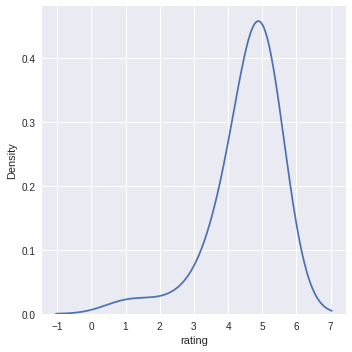

In [ ]:
sns.displot(data=data,x='rating', kind='kde',bw_adjust=6)

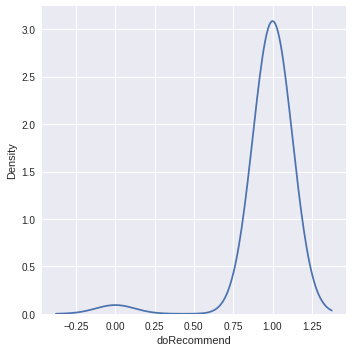

In [ ]:
sns.displot(data=data,x='doRecommend', kind='kde',bw_adjust=6)

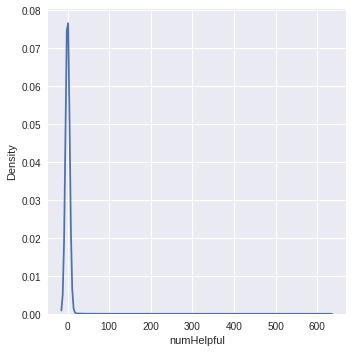

In [ ]:
sns.displot(data=data,x='numHelpful', kind='kde',bw_adjust=6)

## count plot

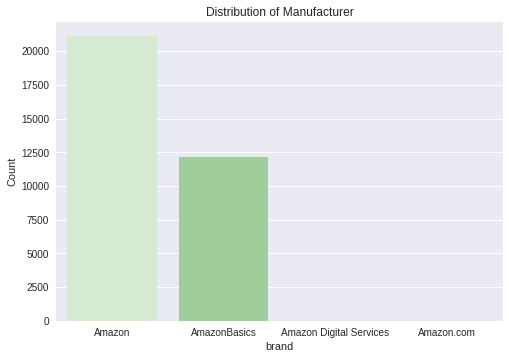

In [ ]:
sns.countplot(data['manufacturer'], palette='Greens')

plt.title('Distribution of Manufacturer')
plt.xlabel('brand')
plt.ylabel('Count')
plt.show()

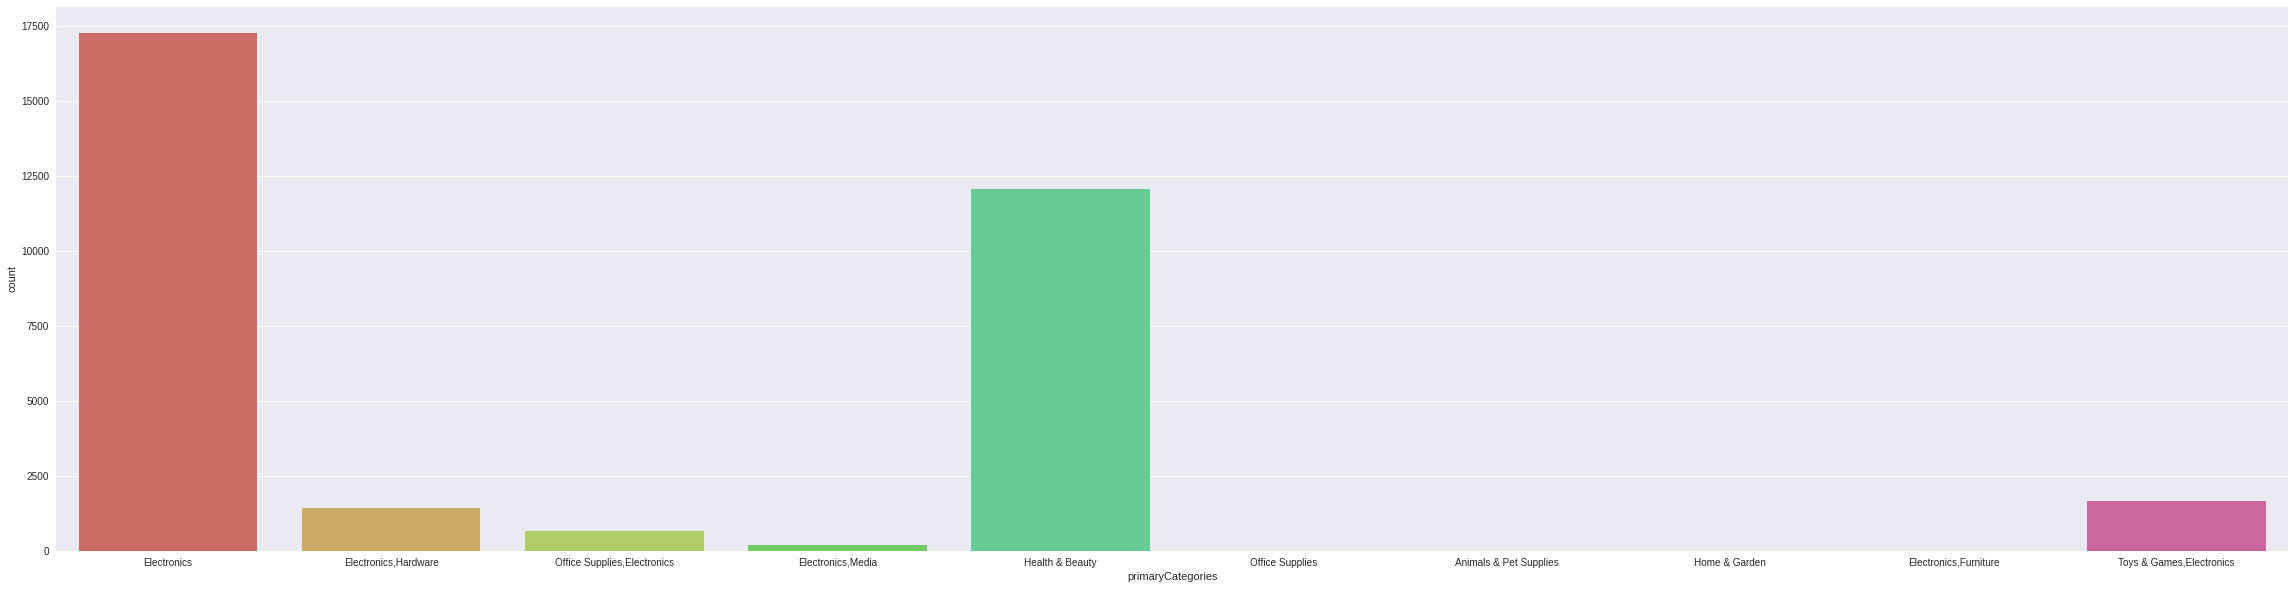

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(40,10))
sns.countplot(data["primaryCategories"], palette="hls");

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data["rating"], palette="hls");

In [ ]:
data['brand']=data['brand'].replace({'AmazonBasics':'Amazonbasics'})

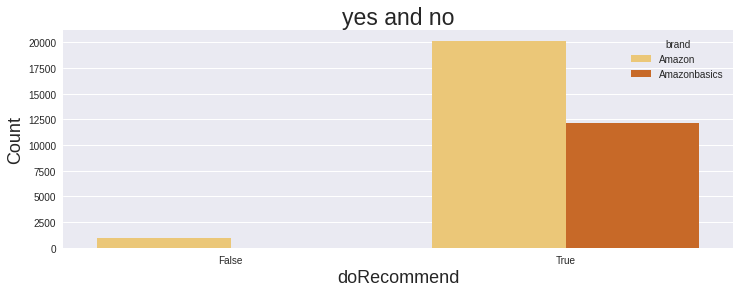

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='doRecommend', data=data, hue='brand', palette='YlOrBr') 
plt.title('yes and no', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('doRecommend',size=18)
plt.show()

## scatter plot

Text(0.5, 1.0, 'Scatter plot of brand vs primaryCategories')

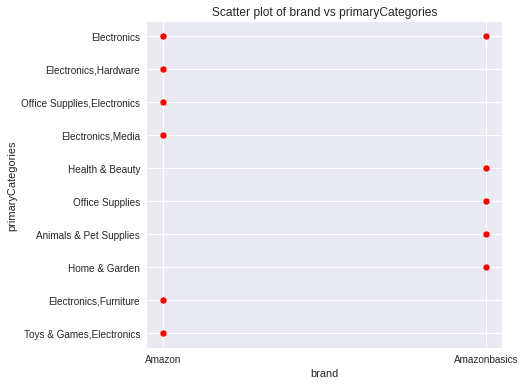

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='brand',y='primaryCategories',data=data,color='red')
ax.set_title('Scatter plot of brand vs primaryCategories')

## strip plot

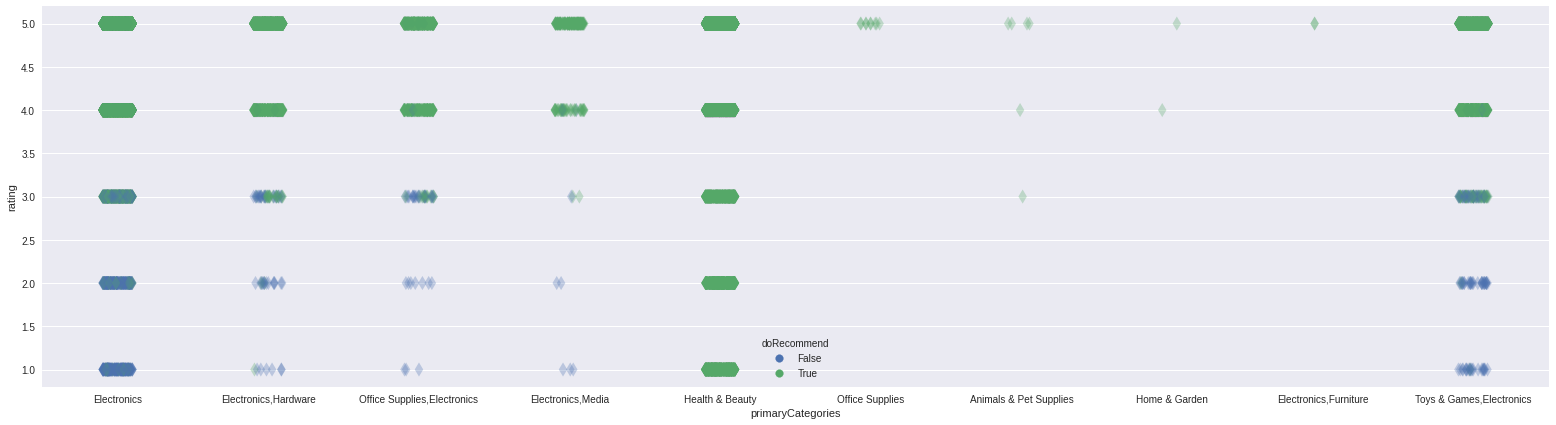

In [ ]:
plt.figure(figsize=(27,7))
sns.stripplot(x= "primaryCategories", y = "rating", hue="doRecommend", size=10, data = data,marker= 'd',alpha=0.3)
plt.show()

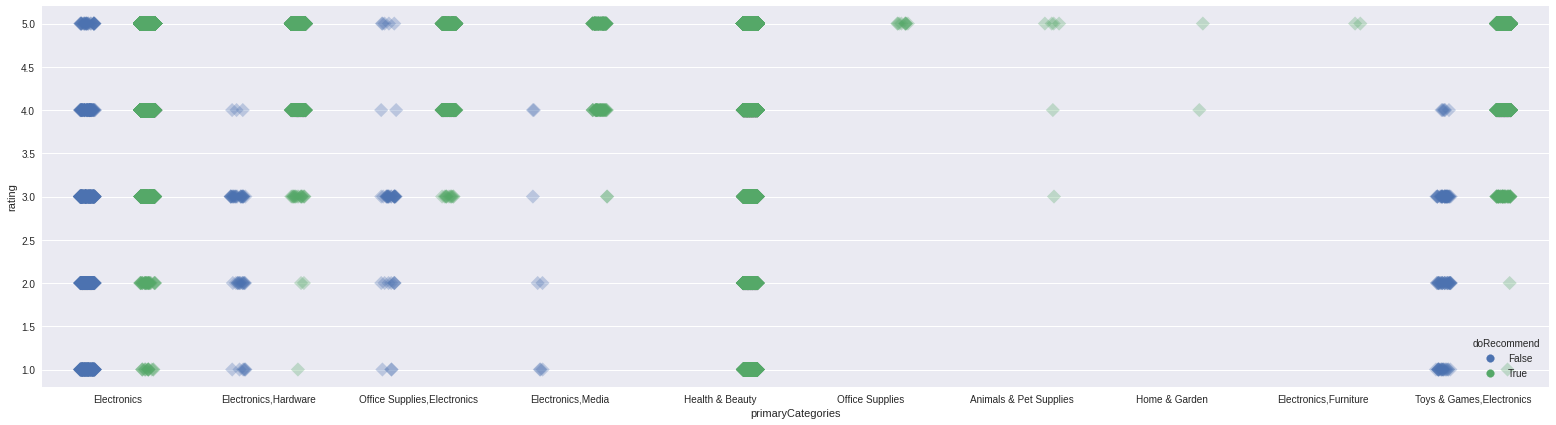

In [ ]:
plt.figure(figsize=(27,7))
sns.stripplot(x= "primaryCategories", y = "rating", hue="doRecommend",dodge=True, size=10, data = data,marker= 'D',alpha=0.3)
plt.show()

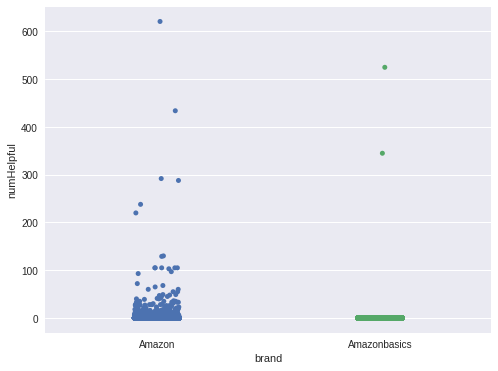

In [ ]:
plt.figure(figsize=(8,6))

sns.stripplot(x=data.brand,y= data.numHelpful)

## pie chart

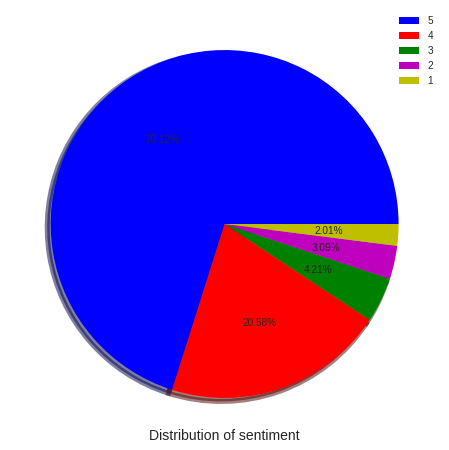

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['5', '4','3','2','1']
colors = ['b','r','g','m','y']
plt.pie(data['rating'].value_counts(), autopct='%0.2f%%',colors=colors,shadow=True,wedgeprops={'linewidth': 5, 'linestyle': 'solid', 'antialiased': True})

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels)
plt.show()

In [ ]:
data['brand'].value_counts()

Amazon          21140
Amazonbasics    12178
Name: brand, dtype: int64

In [ ]:
features = ['name','asins', 'brand', 'primaryCategories', 'doRecommend', 'numHelpful', 'rating', 'reviews.title', 'reviews.text']

In [ ]:
kc = data[features].copy()
kc.dropna(inplace=True)
kc.reset_index(inplace=True,drop=True)

In [ ]:
data.shape

(33318, 17)

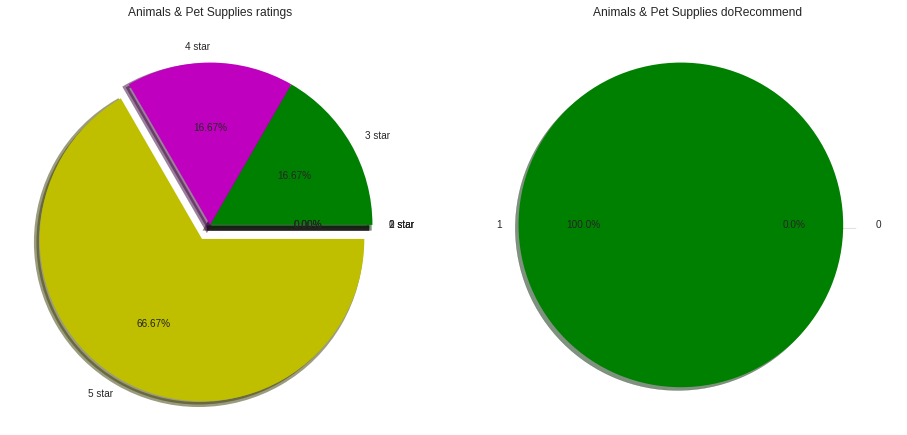

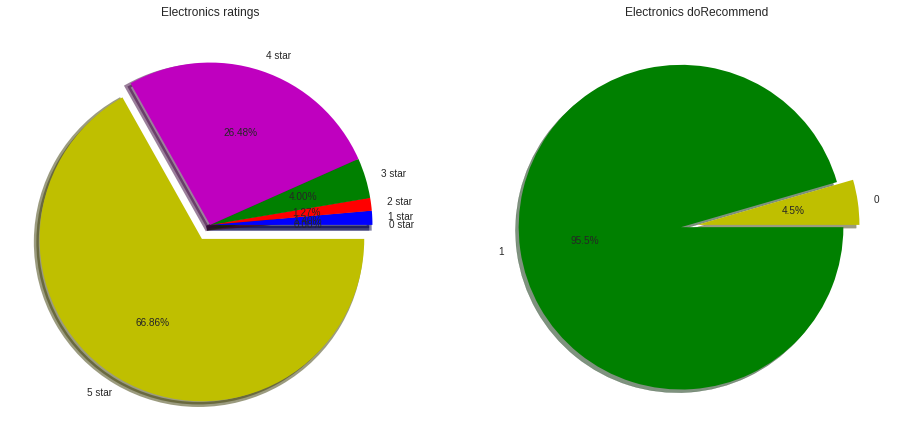

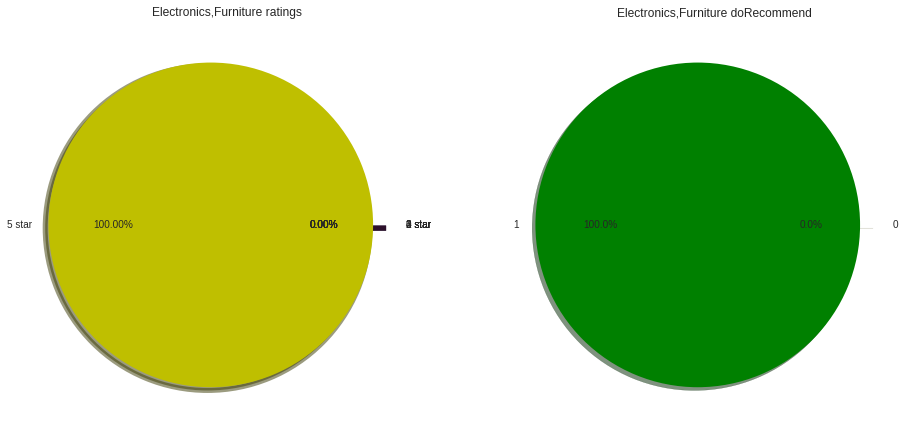

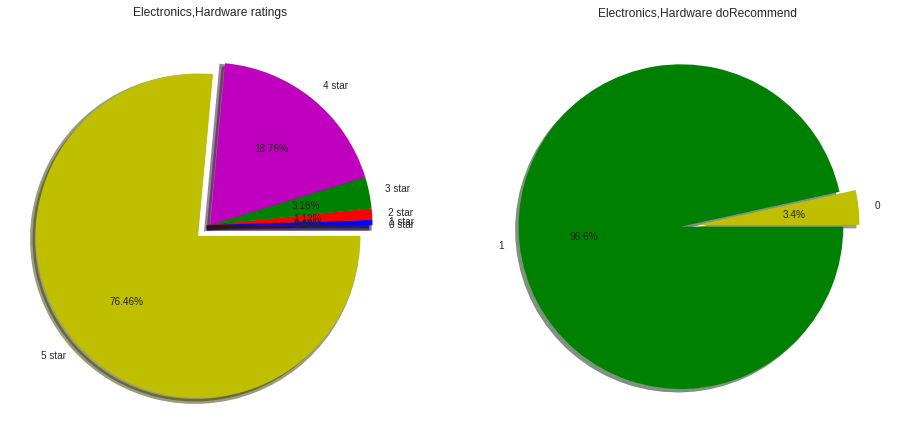

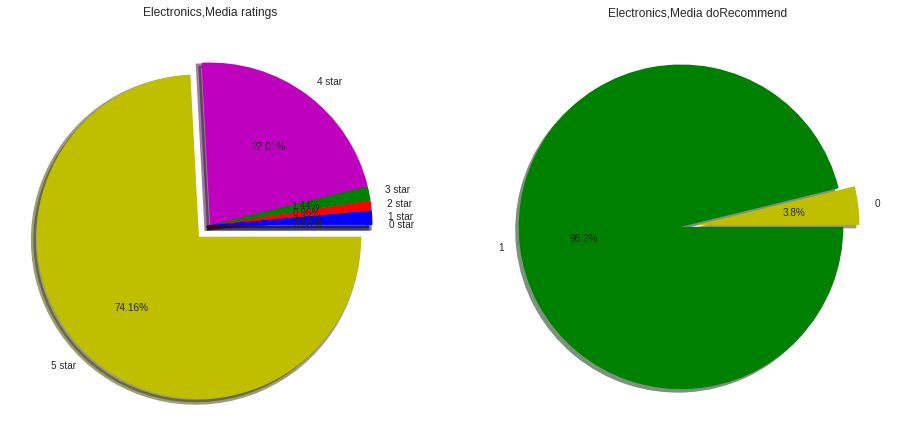

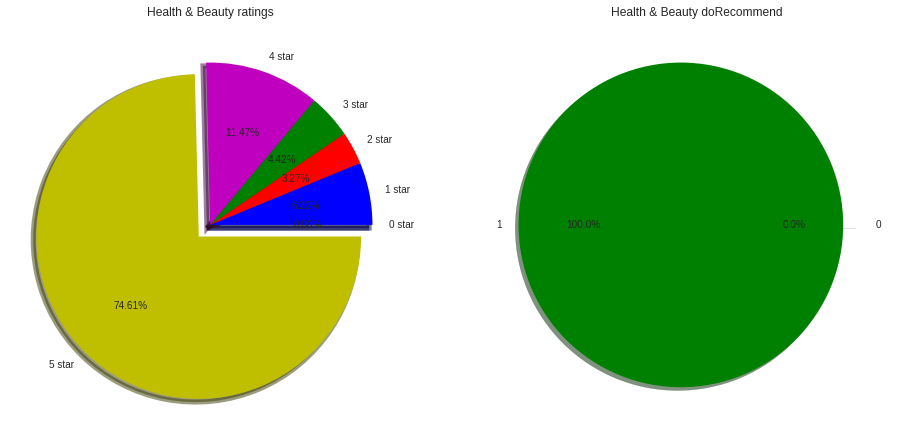

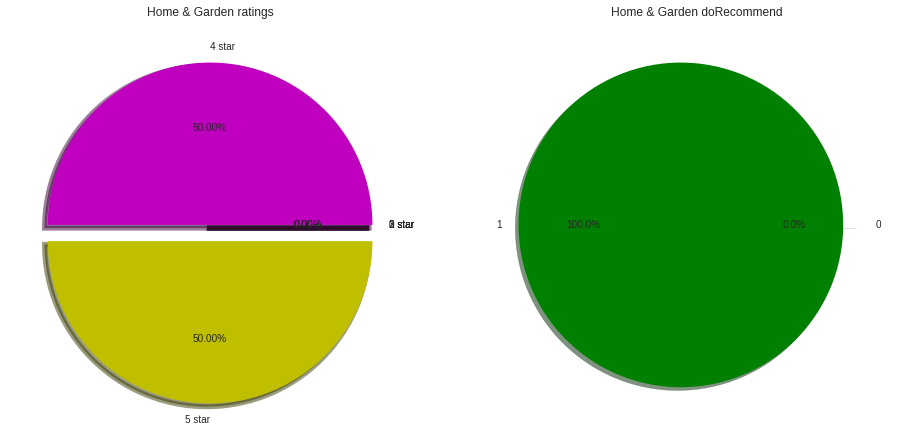

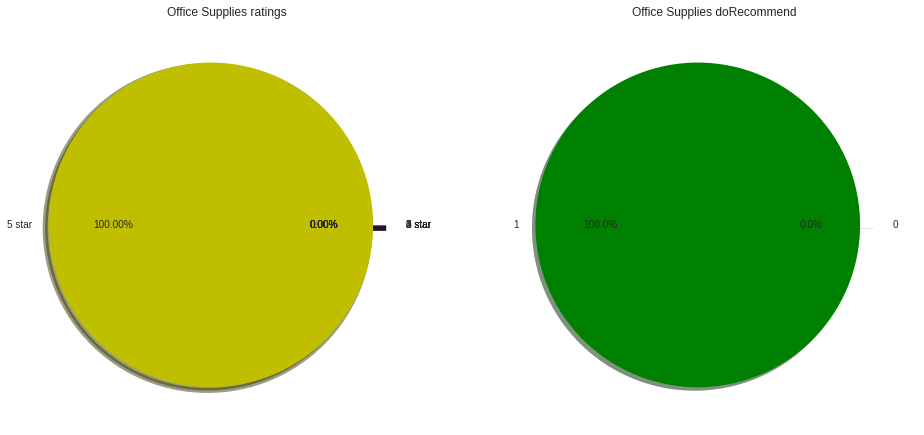

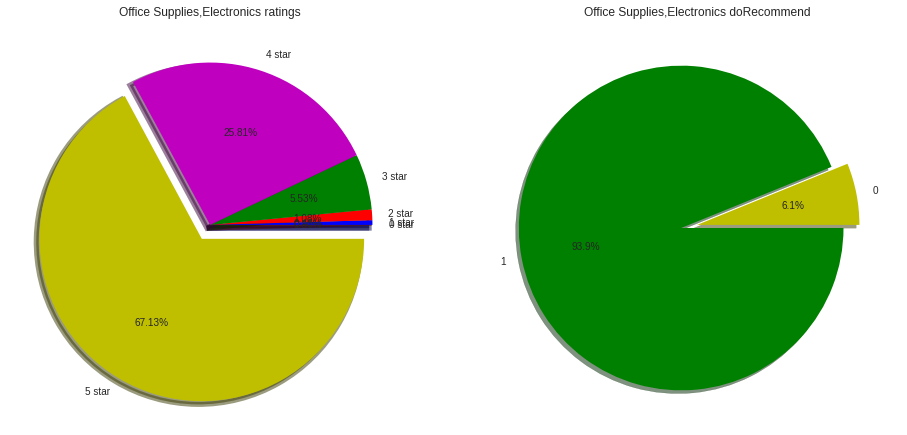

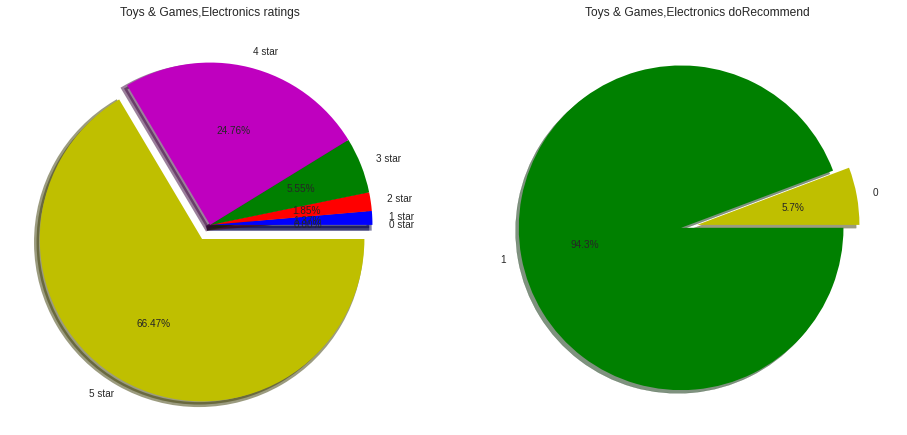

In [ ]:
def draw_pie(kc,title=None):

    fig = plt.figure(1, figsize=(16, 14))

    count=[]
    labels=[]
    for i in range(max(kc['rating'])+1):
        labels.append(f'{i} star')
        count.append((kc['rating'] == i).sum())

    colors = ['b','b','r','g','m','y']
    explode = [0,0,0,0,0,0.1]
    plt.subplot(1,2,1)
    plt.pie(count, labels=labels, colors=colors, explode=explode,shadow=True,wedgeprops={'linewidth': 5, 'linestyle': 'solid', 'antialiased': True},autopct='%1.2f%%')
    plt.title(title)
    
    count=[]
    labels=[]
    for i in range(2):
        labels.append(i)
        count.append((kc['doRecommend'] == i).sum())

    colors=['y','g']
    plt.subplot(1,2,2)
    plt.pie(count, labels=labels, colors=colors, explode=[0,0.1],shadow=0.3,
            autopct='%1.1f%%')
    plt.title(f'{item} doRecommend')

    plt.show()


for item,kc in kc.groupby('primaryCategories'):
    draw_pie(kc, title=f'{item} ratings')

## hist plot

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33318 entries, 0 to 33317
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33318 non-null  object 
 1   dateAdded           33318 non-null  object 
 2   dateUpdated         33318 non-null  object 
 3   name                33318 non-null  object 
 4   asins               33318 non-null  object 
 5   brand               33318 non-null  object 
 6   primaryCategories   33318 non-null  object 
 7   manufacturer        33318 non-null  object 
 8   manufacturerNumber  33318 non-null  object 
 9   reviews.date        33318 non-null  object 
 10  reviews.dateSeen    33318 non-null  object 
 11  doRecommend         33318 non-null  object 
 12  numHelpful          33318 non-null  float64
 13  rating              33318 non-null  int64  
 14  reviews.text        33318 non-null  object 
 15  reviews.title       33318 non-null  object 
 16  revi

In [ ]:
plot_features = [ 'numHelpful','rating']

p = data[plot_features].hist(figsize = (10,10), grid=False, bins=5,color='lime',edgecolor="black")

## box plot

In [ ]:
data.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
name                  0
asins                 0
brand                 0
primaryCategories     0
manufacturer          0
manufacturerNumber    0
reviews.date          0
reviews.dateSeen      0
doRecommend           0
numHelpful            0
rating                0
reviews.text          0
reviews.title         0
reviews.username      0
dtype: int64

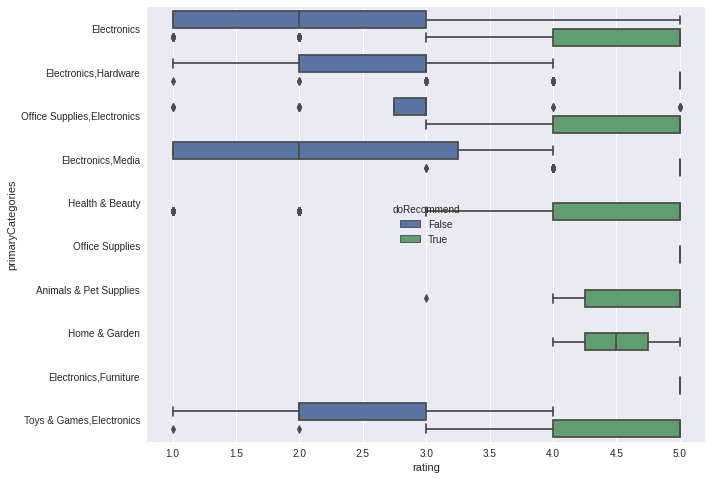

In [ ]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.boxplot(x="rating", y="primaryCategories", hue="doRecommend", data=data)

# **Endoding**

In [ ]:
data.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
name                  0
asins                 0
brand                 0
primaryCategories     0
manufacturer          0
manufacturerNumber    0
reviews.date          0
reviews.dateSeen      0
doRecommend           0
numHelpful            0
rating                0
reviews.text          0
reviews.title         0
reviews.username      0
dtype: int64

In [ ]:
data['brand'].value_counts()

Amazon          21140
Amazonbasics    12178
Name: brand, dtype: int64

In [ ]:
data['brand']=data['brand'].replace({'AmazonBasics':'Amazonbasics'})

In [ ]:
Label_Encoder = LabelEncoder()
labels = Label_Encoder.fit_transform(data.brand)
data['brand'] = labels

In [ ]:
labels = Label_Encoder.fit_transform(data.primaryCategories)
data['primaryCategories'] = labels

In [ ]:
labels = Label_Encoder.fit_transform(data.manufacturer)
data['manufacturer'] = labels

In [ ]:
labels = Label_Encoder.fit_transform(data.manufacturerNumber)
data['manufacturerNumber'] = labels

In [ ]:
labels = Label_Encoder.fit_transform(data.doRecommend)
data['doRecommend'] = labels

In [ ]:
data.rename(columns={'reviews.date': 'reviews_date', 'reviews.dateSeen': 'reviews_dateSeen'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33318 entries, 0 to 33317
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33318 non-null  object 
 1   dateAdded           33318 non-null  object 
 2   dateUpdated         33318 non-null  object 
 3   name                33318 non-null  object 
 4   asins               33318 non-null  object 
 5   brand               33318 non-null  int64  
 6   primaryCategories   33318 non-null  int64  
 7   manufacturer        33318 non-null  int64  
 8   manufacturerNumber  33318 non-null  int64  
 9   reviews_date        33318 non-null  object 
 10  reviews_dateSeen    33318 non-null  object 
 11  doRecommend         33318 non-null  int64  
 12  numHelpful          33318 non-null  float64
 13  rating              33318 non-null  int64  
 14  reviews.text        33318 non-null  object 
 15  reviews.title       33318 non-null  object 
 16  revi

In [ ]:
data.sample(5)

id  ...   reviews.username
6723   AVpgNzjwLJeJML43Kpxn  ...     Byjohn p gyger
14127  AVpe7xlELJeJML43ypLz  ...     Byjohn p gyger
7048   AVpgNzjwLJeJML43Kpxn  ...  ByAmazon Customer
12066  AVpgNzjwLJeJML43Kpxn  ...           ByDWally
53     AVqVGZNvQMlgsOJE6eUY  ...              Stu76

[5 rows x 17 columns]

In [ ]:
data.head()

id  ... reviews.username
0  AVqVGZNvQMlgsOJE6eUY  ...           llyyue
1  AVqVGZNvQMlgsOJE6eUY  ...           Charmi
2  AVqVGZNvQMlgsOJE6eUY  ...     johnnyjojojo
3  AVqVGZNvQMlgsOJE6eUY  ...          Kdperry
4  AVqVGZNvQMlgsOJE6eUY  ...      Johnnyblack

[5 rows x 17 columns]

In [ ]:
data.dtypes


id                     object
dateAdded              object
dateUpdated            object
name                   object
asins                  object
brand                   int64
primaryCategories       int64
manufacturer            int64
manufacturerNumber      int64
reviews_date           object
reviews_dateSeen       object
doRecommend             int64
numHelpful            float64
rating                  int64
reviews.text           object
reviews.title          object
reviews.username       object
dtype: object

# **Mode Testing**

## **SVM model**

In [ ]:
X = data.iloc[:, [5,6,7,8,11,13]].values
Y = data.iloc[:, 3].values

###Split the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

###Feature scaling

In [ ]:
#Write your Code Here
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

###   Fitting the classifier into the Training set

In [ ]:
#Write your Code Here
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(random_state=0)

In [ ]:
#Write your Code Here
Y_Pred = classifier.predict(X_Test)

In [ ]:
#Write your Code Here
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,  59, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   6,   0,   0],
       [  0,   0,   0, ...,   0, 125,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
#Write your Code Here
print(classification_report(Y_Test, Y_Pred))

                                                                                                                                                        precision    recall  f1-score   support

                                                                                      All-New Fire 7 Tablet with Alexa, 7" Display, 8 GB - Marine Blue       0.00      0.00      0.00        28
                                                                       All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case       0.00      0.00      0.00        66
                                                                       All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case       0.81      0.92      0.86        64
                                                           All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers       0.60      0.96      0.74       223
                                       

## **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [ ]:
Y_Pred= classifier.predict(X_Test)  

In [ ]:
#Write your Code Here
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[ 27,   0,   0, ...,   0,   0,   0],
       [  0,  64,   0, ...,   0,   0,   0],
       [  0,   1,  60, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   6,   0,   0],
       [  0,   0,   0, ...,   0, 126,   0],
       [  0,   0,   0, ...,   0,   0,   2]])

In [ ]:
#Write your Code Here
print(classification_report(Y_Test, Y_Pred))

                                                                                                                                                        precision    recall  f1-score   support

                                                                                      All-New Fire 7 Tablet with Alexa, 7" Display, 8 GB - Marine Blue       0.96      0.96      0.96        28
                                                                       All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case       0.94      0.97      0.96        66
                                                                       All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case       1.00      0.94      0.97        64
                                                           All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers       0.97      1.00      0.98       223
                                       

In [ ]:
data['key'] = 0

In [ ]:
for i in range(0,data.shape[0]):
  data.iloc[ [i] , [17]  ] = i


In [ ]:
data['asins'].value_counts()

B00QWO9P0O,B00LH3DMUO               8342
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y22C2Y                          1986
                                    ... 
B00OP6SMCI                             1
B00VKTZFB4                             1
B00QAVO43C                             1
B010RLCH2U                             1
B01L7XWEQQ                             1
Name: asins, Length: 70, dtype: int64

In [ ]:
data.shape

(33318, 18)

#**heat map**

In [ ]:
sns.heatmap(data.corr(), vmin=-0.2, vmax= 0.2,linecolor='black',cmap='RdBu',linewidths='1')

# **SENTIMENTAL ANALYSIS**

In [ ]:
senti_data = data[['reviews.text', 'rating', 'key']]
senti_data.head()

reviews.text  rating  key
0  I thought it would be as big as small paper bu...       3    0
1  This kindle is light and easy to use especiall...       5    1
2  Didnt know how much i'd use a kindle so went f...       4    2
3  I am 100 happy with my purchase. I caught it o...       5    3
4  Solid entry level Kindle. Great for kids. Gift...       5    4

In [ ]:
senti_data.isnull().sum()

reviews.text    0
rating          0
key             0
dtype: int64

In [ ]:
print(data['reviews.text'][0])

I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.


In [ ]:
senti_data['rating'].value_counts().sort_index(ascending = False)

5    23362
4     6856
3     1402
2      670
1     1028
Name: rating, dtype: int64

In [ ]:
score = {1:0, 2:0, 3:0, 4:1, 5:1}

sentiment = {0: 'Negative', 1: 'Positive'}

senti_data['score'] = senti_data['rating'].map(score)
senti_data['sentiment'] = senti_data['score'].map(sentiment)

senti_data.head()

reviews.text  rating  ...  score  sentiment
0  I thought it would be as big as small paper bu...       3  ...      0   Negative
1  This kindle is light and easy to use especiall...       5  ...      1   Positive
2  Didnt know how much i'd use a kindle so went f...       4  ...      1   Positive
3  I am 100 happy with my purchase. I caught it o...       5  ...      1   Positive
4  Solid entry level Kindle. Great for kids. Gift...       5  ...      1   Positive

[5 rows x 5 columns]

In [ ]:
words_used = ' '.join(senti_data['reviews.text'])
words_used = pd.Series(words_used.split())
words_used


0               I
1         thought
2              it
3           would
4              be
           ...   
889334         to
889335     anyone
889336         on
889337          a
889338    budget.
Length: 889339, dtype: object

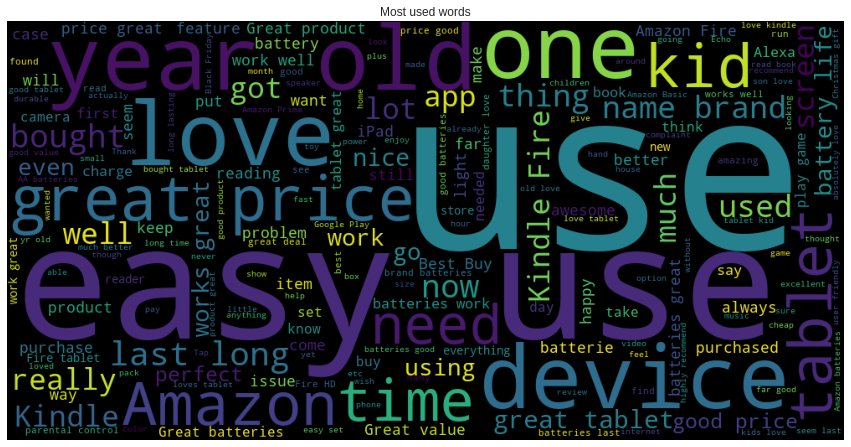

In [ ]:
most_wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words_used))

plt.figure(figsize=(15,8))

plt.imshow(most_wordcloud)
plt.title("Most used words")

plt.axis("off")
plt.show()

In [ ]:
positive_words = pd.Series(' '.join(senti_data[ senti_data['sentiment'] == 'Positive']['reviews.text']).split() )
positive_words

0            This
1          kindle
2              is
3           light
4             and
           ...   
776319         to
776320     anyone
776321         on
776322          a
776323    budget.
Length: 776324, dtype: object

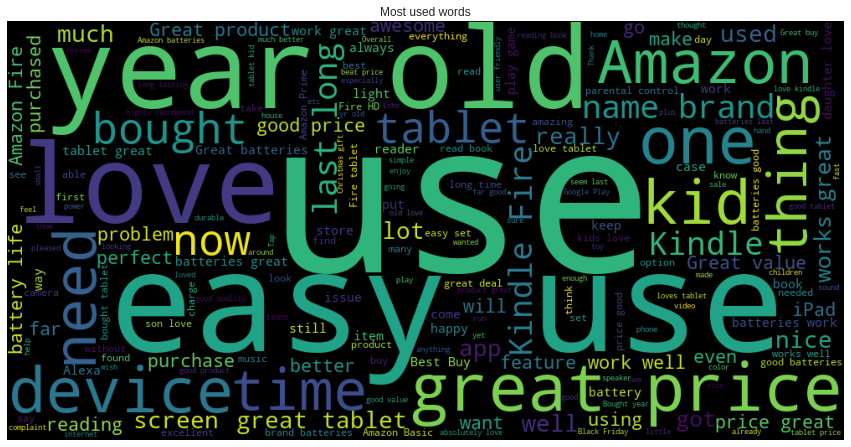

In [ ]:
most_wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words))

plt.figure(figsize=(15,8))

plt.imshow(most_wordcloud)
plt.title("Most used words")

plt.axis("off")
plt.show()

In [ ]:
negative_words = pd.Series(' '.join(senti_data[ senti_data['sentiment'] == 'Negative']['reviews.text']).split() )
negative_words

0               I
1         thought
2              it
3           would
4              be
           ...   
113010         at
113011          a
113012       very
113013       good
113014     price.
Length: 113015, dtype: object

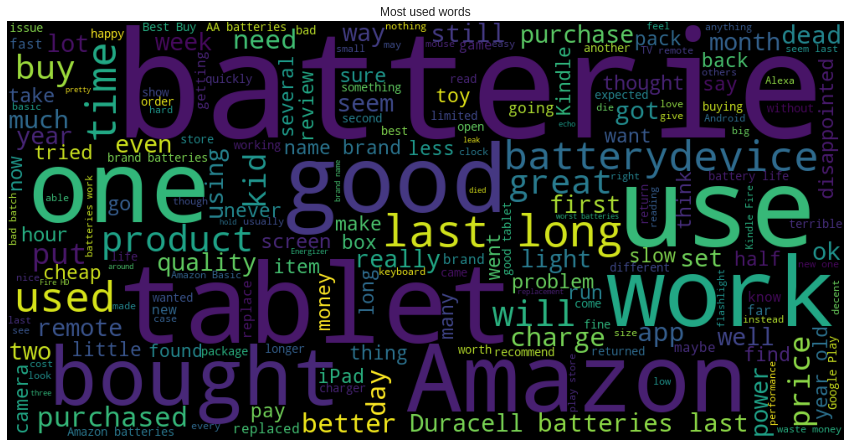

In [ ]:
most_wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words))

plt.figure(figsize=(15,8))

plt.imshow(most_wordcloud)
plt.title("Most used words")

plt.axis("off")
plt.show()

### Text Processing

In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('wordnet')

#cleaning


def clean_text(text:str):
    
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text


# remove stopwords

def remove_stopwords(text:str):
    
    text = str(text)
    filtered_sentence = []

    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text


#Lemmatization

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lemmatize(text:str):
    
    text = str(text)
    
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    words = word_tokenize(text)

    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#applying

senti_data['text'] = senti_data['reviews.text'].apply(clean_text)

senti_data['text'] = senti_data['text'].apply(remove_stopwords)
senti_data['text'] = senti_data['text'].apply(lemmatize)

senti_data['text']

0        i think would be as big a small paper but turn...
1                kindle light easy use especially at beach
2        didnt know how much i d use kindle so go for l...
3        i be happy with my purchase i catch on sale at...
4        solid entry level kindle great for kid gift fo...
                               ...                        
33313    i get of these for my yr old twin my yr old ha...
33314    i buy for my niece for christmas gift she year...
33315    very nice for light internet browse keep on to...
33316    tablet do absolutely everything i want i can w...
33317    at ninety dollar expectionations be low but st...
Name: text, Length: 33318, dtype: object

In [ ]:
senti_data[senti_data['text'].isnull()]

Empty DataFrame
Columns: [reviews.text, rating, key, score, sentiment, text]
Index: []

In [ ]:
vectorizer = TfidfVectorizer(max_features=800)
vectorizer.fit(senti_data['text'])
features = vectorizer.transform(senti_data['text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26721878, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:

final = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

final['senti_score'] = senti_data['score']
final['key'] = senti_data['key']
final

100   aa  aaa  ability  ...  äôs  äôt  senti_score    key
0      0.000000  0.0  0.0      0.0  ...  0.0  0.0            0      0
1      0.000000  0.0  0.0      0.0  ...  0.0  0.0            1      1
2      0.000000  0.0  0.0      0.0  ...  0.0  0.0            1      2
3      0.000000  0.0  0.0      0.0  ...  0.0  0.0            1      3
4      0.000000  0.0  0.0      0.0  ...  0.0  0.0            1      4
...         ...  ...  ...      ...  ...  ...  ...          ...    ...
33313  0.000000  0.0  0.0      0.0  ...  0.0  0.0            1  33313
33314  0.000000  0.0  0.0      0.0  ...  0.0  0.0            1  33314
33315  0.000000  0.0  0.0      0.0  ...  0.0  0.0            1  33315
33316  0.267219  0.0  0.0      0.0  ...  0.0  0.0            1  33316
33317  0.000000  0.0  0.0      0.0  ...  0.0  0.0            1  33317

[33318 rows x 802 columns]

# **Feature Selection**

In [ ]:
print(final.shape)
print(data.shape)

(33318, 802)
(33318, 18)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0)
var_thres.fit(final)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
constant_columns=[column for column in final.columns if column not in final.columns[var_thres.get_support()]]
print(len(constant_columns))
constant_columns

0


[]

In [ ]:
final.drop(constant_columns,axis=1,inplace=True)
final.shape

(33318, 802)

### **Removing Duplicate Features**

In [ ]:
final = final.T
final.shape

(802, 33318)

In [ ]:
print(final.duplicated().sum())

0


In [ ]:
final = final.T
final.shape

(33318, 802)

**Removing highly Correlated columns**

In [ ]:
final.corr()

100        aa       aaa  ...       äôt  senti_score       key
100          1.000000 -0.002226 -0.003748  ... -0.002645     0.010610  0.016035
aa          -0.002226  1.000000  0.148008  ... -0.006011    -0.033933 -0.058122
aaa         -0.003748  0.148008  1.000000  ... -0.004855    -0.026069 -0.046449
ability     -0.003319 -0.006368 -0.004741  ... -0.001871     0.014944  0.012119
able        -0.000472 -0.012660 -0.008281  ...  0.000185     0.008336  0.021008
...               ...       ...       ...  ...       ...          ...       ...
yr          -0.004589 -0.006184 -0.008422  ... -0.005620    -0.008174  0.058749
äôs         -0.002925 -0.006647 -0.005368  ...  0.135078     0.013763 -0.031147
äôt         -0.002645 -0.006011 -0.004855  ...  1.000000    -0.008010 -0.020466
senti_score  0.010610 -0.033933 -0.026069  ... -0.008010     1.000000  0.026210
key          0.016035 -0.058122 -0.046449  ... -0.020466     0.026210  1.000000

[802 rows x 802 columns]

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(final, 0.7)
len(set(corr_features))

2

In [ ]:
corr_features

{'friday', 'name'}

In [ ]:
final.drop(corr_features, axis=1, inplace = True)
final.shape

(33318, 800)

In [ ]:
print(final.shape)
final

(33318, 800)


100   aa  aaa  ability  ...  äôs  äôt  senti_score      key
0      0.000000  0.0  0.0      0.0  ...  0.0  0.0          0.0      0.0
1      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      1.0
2      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      2.0
3      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      3.0
4      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      4.0
...         ...  ...  ...      ...  ...  ...  ...          ...      ...
33313  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33313.0
33314  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33314.0
33315  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33315.0
33316  0.267219  0.0  0.0      0.0  ...  0.0  0.0          1.0  33316.0
33317  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33317.0

[33318 rows x 800 columns]

 **mutual info**

In [ ]:
X= final.drop(labels=['senti_score', 'key'], axis=1)
y= final['senti_score']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.head()

100   aa  aaa  ability  able  about  ...  young  your  youtube   yr  äôs  äôt
10720  0.0  0.0  0.0      0.0   0.0    0.0  ...    0.0   0.0      0.0  0.0  0.0  0.0
9439   0.0  0.0  0.0      0.0   0.0    0.0  ...    0.0   0.0      0.0  0.0  0.0  0.0
16823  0.0  0.0  0.0      0.0   0.0    0.0  ...    0.0   0.0      0.0  0.0  0.0  0.0
32975  0.0  0.0  0.0      0.0   0.0    0.0  ...    0.0   0.0      0.0  0.0  0.0  0.0
31883  0.0  0.0  0.0      0.0   0.0    0.0  ...    0.0   0.0      0.0  0.0  0.0  0.0

[5 rows x 798 columns]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X_train,y_train)

mutual_info

array([2.43595667e-03, 2.06129354e-03, 1.58359598e-03, 7.11950328e-04,
       2.69518822e-03, 6.03188420e-03, 0.00000000e+00, 4.36860256e-03,
       1.82689151e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.39261788e-04, 0.00000000e+00, 0.00000000e+00, 2.58742542e-03,
       0.00000000e+00, 0.00000000e+00, 8.36002548e-03, 4.20712751e-03,
       5.74860956e-04, 0.00000000e+00, 3.22529570e-03, 0.00000000e+00,
       9.68109522e-03, 0.00000000e+00, 0.00000000e+00, 9.11051048e-04,
       0.00000000e+00, 4.20680511e-03, 2.69537212e-04, 6.55288916e-04,
       2.86913504e-03, 1.17796746e-04, 4.77986743e-03, 0.00000000e+00,
       7.00008567e-03, 0.00000000e+00, 8.69867973e-05, 1.66871447e-03,
       1.55612086e-03, 8.65225315e-04, 0.00000000e+00, 5.80319795e-03,
       1.94846694e-03, 1.56674351e-03, 0.00000000e+00, 2.39546652e-03,
       0.00000000e+00, 2.76263713e-05, 0.00000000e+00, 1.14413692e-03,
       8.09586332e-03, 2.83213473e-04, 0.00000000e+00, 1.64341114e-03,
      

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

not           0.036200
be            0.030071
for           0.029602
my            0.024048
love          0.022021
                ...   
though        0.000000
ever          0.000000
three         0.000000
especially    0.000000
timer         0.000000
Length: 798, dtype: float64

In [ ]:
dd = pd.DataFrame(mutual_info).T
dd

count=0
for i in dd.columns:
  if (dd[i][0] == 0):
    final.drop( i, axis=1, inplace = True)

final.shape

(33318, 578)

In [ ]:
final

100   aa  aaa  ability  ...  äôs  äôt  senti_score      key
0      0.000000  0.0  0.0      0.0  ...  0.0  0.0          0.0      0.0
1      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      1.0
2      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      2.0
3      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      3.0
4      0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0      4.0
...         ...  ...  ...      ...  ...  ...  ...          ...      ...
33313  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33313.0
33314  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33314.0
33315  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33315.0
33316  0.267219  0.0  0.0      0.0  ...  0.0  0.0          1.0  33316.0
33317  0.000000  0.0  0.0      0.0  ...  0.0  0.0          1.0  33317.0

[33318 rows x 578 columns]

In [ ]:
'''
from sklearn.feature_selection import SelectKBest

sel_five=SelectKBest(mutual_info_classif,k=400)
sel_five.fit(X_train,y_train)
X_train.columns[sel_five.get_support()]
'''

'\nfrom sklearn.feature_selection import SelectKBest\n\nsel_five=SelectKBest(mutual_info_classif,k=400)\nsel_five.fit(X_train,y_train)\nX_train.columns[sel_five.get_support()]\n'

In [ ]:
print(data.shape)
print(final.shape)

(33318, 18)
(33318, 578)


In [ ]:
data_final = pd.merge(data, final, on = 'key')

data_final.drop('key', inplace=True, axis=1)
data_final.drop('reviews.text', inplace=True, axis=1)
data_final.drop('reviews.title', inplace=True, axis=1)
data_final   #final dataset after merging data and sentimental analysis, want only sentimental analysis then go for "final" dataFrame

id             dateAdded  ...  äôt senti_score
0      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  ...  0.0         0.0
1      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  ...  0.0         1.0
2      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  ...  0.0         1.0
3      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  ...  0.0         1.0
4      AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  ...  0.0         1.0
...                     ...                   ...  ...  ...         ...
33313  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  ...  0.0         1.0
33314  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  ...  0.0         1.0
33315  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  ...  0.0         1.0
33316  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  ...  0.0         1.0
33317  AVqkIhxunnc1JgDc3kg_  2017-03-06T14:59:43Z  ...  0.0         1.0

[33318 rows x 592 columns]

# **Recommender system By using K NearestNeighbors**

In [ ]:
df4 = data_final[['id','name','primaryCategories','rating','reviews.username']]
df4

id  ... reviews.username
0      AVqVGZNvQMlgsOJE6eUY  ...           llyyue
1      AVqVGZNvQMlgsOJE6eUY  ...           Charmi
2      AVqVGZNvQMlgsOJE6eUY  ...     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY  ...          Kdperry
4      AVqVGZNvQMlgsOJE6eUY  ...      Johnnyblack
...                     ...  ...              ...
33313  AVqkIhxunnc1JgDc3kg_  ...   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_  ...        fireman21
33315  AVqkIhxunnc1JgDc3kg_  ...   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_  ...           SandyJ
33317  AVqkIhxunnc1JgDc3kg_  ...             Hung

[33318 rows x 5 columns]

In [ ]:
df4.isnull().sum()

id                   0
name                 0
primaryCategories    0
rating               0
reviews.username     0
dtype: int64

In [ ]:
df4.columns = ['product_id','product_name','primaryCategories','rating','reviews.username']

In [ ]:
df4

product_id  ... reviews.username
0      AVqVGZNvQMlgsOJE6eUY  ...           llyyue
1      AVqVGZNvQMlgsOJE6eUY  ...           Charmi
2      AVqVGZNvQMlgsOJE6eUY  ...     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY  ...          Kdperry
4      AVqVGZNvQMlgsOJE6eUY  ...      Johnnyblack
...                     ...  ...              ...
33313  AVqkIhxunnc1JgDc3kg_  ...   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_  ...        fireman21
33315  AVqkIhxunnc1JgDc3kg_  ...   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_  ...           SandyJ
33317  AVqkIhxunnc1JgDc3kg_  ...             Hung

[33318 rows x 5 columns]

In [ ]:
product_details = df4[['product_id','product_name','primaryCategories']]
product_details = product_details.drop_duplicates(subset = ['product_id'])
product_details.shape

(69, 3)

In [ ]:
## nan values in rating columns is not acceptable so we remove that
product_data = pd.DataFrame(df4.groupby('product_id')['rating'].mean())
product_data['Number of ratings'] = df4.groupby('product_id')['rating'].count().values
product_data

rating  Number of ratings
product_id                                       
AV-ETMhgYSSHbkXwpNb9  4.750000                  4
AV-EVZITKZqtpbFMSoqc  4.590909                 22
AV-XeQLWuC1rwyj_gbP5  5.000000                  3
AV2ElNnuvKc47QAVouhY  4.000000                  1
AVpe5Q3sLJeJML43xt5X  5.000000                  1
...                        ...                ...
AWMjXUGdHh53nbDRJ9LA  4.333333                  3
AWP6zKOtIwln0LfXnf2p  4.428571                  7
AWYAV-i9Iwln0LfXqrUq  4.500000                  2
AWdDioCIHh53nbDRScLV  5.000000                  2
AWdDlIX9Hh53nbDRSc-U  5.000000                  7

[69 rows x 2 columns]

In [ ]:
product_data.describe()

rating  Number of ratings
count  69.000000          69.000000
mean    4.490294         482.869565
std     0.593467        1190.879086
min     1.000000           1.000000
25%     4.494624           5.000000
50%     4.585366          58.000000
75%     4.715503         293.000000
max     5.000000        8342.000000

In [ ]:
product_data = product_data[product_data['Number of ratings'] >= 20]
product_data

rating  Number of ratings
product_id                                       
AV-EVZITKZqtpbFMSoqc  4.590909                 22
AVpe7xlELJeJML43ypLz  4.453594               3728
AVpf68A5ilAPnD_xkjSq  4.160000                 25
AVpfIfGA1cnluZ0-emyp  4.737705                 61
AVpflnS7ilAPnD_xehxE  4.523810                 21
AVpfpK8KLJeJML43BCuD  4.529056                826
AVpftoij1cnluZ0-p5n2  4.862069                 58
AVpfw2hvilAPnD_xh0rH  4.531026               1676
AVpgNzjwLJeJML43Kpxn  4.448214               8342
AVpgdkC8ilAPnD_xsvyi  4.494624               1395
AVph0EeEilAPnD_x9myq  4.546324               1986
AVphPmHuilAPnD_x3E5h  4.715503                587
AVpidLjVilAPnD_xEVpI  4.629268                205
AVpjEN4jLJeJML43rpUe  4.511004               1454
AVqVGWLKnnc1JgDc3jF1  4.531840               1429
AVqVGWQDv8e3D1O-ldFr  4.584388               2370
AVqVGZN9QMlgsOJE6eUZ  4.702128                 94
AVqVGZNvQMlgsOJE6eUY  4.433628                113
AVqVGZO3nnc1JgDc3jGK  4.641026                 78
AVqVGZQBQMlgsOJE6eUb  4.612903                 62
AVqVGZSEQMlgsOJE6eUc  4.558296                446
AVqkIdZiv8e3D1O-leaJ  4.515366                846
AVqkIh8WQMlgsOJE6fu-  4.555556                198
AVqkIh9HQMlgsOJE6fu_  4.526549                226
AVqkIhkhv8e3D1O-lebZ  4.576271                118
AVqkIhwDv8e3D1O-lebb  4.598494                797
AVqkIhxunnc1JgDc3kg_  4.597217               2443
AVqkIiKWnnc1JgDc3khH  4.593548                155
AVqkIj9snnc1JgDc3khU  4.569378                209
AVwjfXp4QMlgsOJE8qmk  4.630901                233
AVwjfXqqQMlgsOJE8qmm  4.641638                293
AVzNj1Y0GV-KLJ3aarCo  4.600000                160
AVzYlGj3vKc47QAVeZRH  4.607692                130
AVzYlGkFvKc47QAVeZRI  4.578709                883
AVzYlGnuGV-KLJ3abPUD  4.585366                 82
AWFUWc8THh53nbDRF6YO  4.663551                642
AWK8z0pOIwln0LfXlSxH  4.640625                192
AWMjT0WguC1rwyj_rFh3  4.749153                590

In [ ]:
matrix_df = df4[['product_id','rating','reviews.username']]
matrix_df

product_id  rating reviews.username
0      AVqVGZNvQMlgsOJE6eUY       3           llyyue
1      AVqVGZNvQMlgsOJE6eUY       5           Charmi
2      AVqVGZNvQMlgsOJE6eUY       4     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY       5          Kdperry
4      AVqVGZNvQMlgsOJE6eUY       5      Johnnyblack
...                     ...     ...              ...
33313  AVqkIhxunnc1JgDc3kg_       5   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_       4        fireman21
33315  AVqkIhxunnc1JgDc3kg_       5   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_       5           SandyJ
33317  AVqkIhxunnc1JgDc3kg_       4             Hung

[33318 rows x 3 columns]

In [ ]:
matrix_df = matrix_df[matrix_df['product_id'].isin(product_data.index)]
matrix_df

product_id  rating reviews.username
0      AVqVGZNvQMlgsOJE6eUY       3           llyyue
1      AVqVGZNvQMlgsOJE6eUY       5           Charmi
2      AVqVGZNvQMlgsOJE6eUY       4     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY       5          Kdperry
4      AVqVGZNvQMlgsOJE6eUY       5      Johnnyblack
...                     ...     ...              ...
33313  AVqkIhxunnc1JgDc3kg_       5   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_       4        fireman21
33315  AVqkIhxunnc1JgDc3kg_       5   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_       5           SandyJ
33317  AVqkIhxunnc1JgDc3kg_       4             Hung

[33175 rows x 3 columns]

In [ ]:
pivot_df = matrix_df.pivot_table(index='reviews.username',columns='product_id',values='rating').fillna(0)
pivot_df

product_id        AV-EVZITKZqtpbFMSoqc  ...  AWMjT0WguC1rwyj_rFh3
reviews.username                        ...                      
000G                               0.0  ...                   0.0
00Gambler                          0.0  ...                   0.0
00JK                               0.0  ...                   0.0
1-Apr                              0.0  ...                   0.0
1000011                            0.0  ...                   0.0
...                                ...  ...                   ...
zetyk                              0.0  ...                   0.0
ziggy24                            0.0  ...                   0.0
zimm                               0.0  ...                   0.0
zmax192                            0.0  ...                   0.0
ztlbxx                             0.0  ...                   0.0

[17299 rows x 38 columns]

In [ ]:
item_user_matrix = matrix_df.pivot_table(index='product_id',columns='reviews.username',values='rating').fillna(0)
item_user_matrix

reviews.username      000G  00Gambler  00JK  ...  zimm  zmax192  ztlbxx
product_id                                   ...                       
AV-EVZITKZqtpbFMSoqc   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpe7xlELJeJML43ypLz   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpf68A5ilAPnD_xkjSq   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfIfGA1cnluZ0-emyp   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpflnS7ilAPnD_xehxE   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfpK8KLJeJML43BCuD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpftoij1cnluZ0-p5n2   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfw2hvilAPnD_xh0rH   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVpgNzjwLJeJML43Kpxn   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpgdkC8ilAPnD_xsvyi   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVph0EeEilAPnD_x9myq   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVphPmHuilAPnD_x3E5h   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpidLjVilAPnD_xEVpI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpjEN4jLJeJML43rpUe   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGWLKnnc1JgDc3jF1   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVqVGWQDv8e3D1O-ldFr   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqVGZN9QMlgsOJE6eUZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZNvQMlgsOJE6eUY   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZO3nnc1JgDc3jGK   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZQBQMlgsOJE6eUb   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZSEQMlgsOJE6eUc   0.0        0.0   0.0  ...   0.0      0.0     5.0
AVqkIdZiv8e3D1O-leaJ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh8WQMlgsOJE6fu-   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh9HQMlgsOJE6fu_   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhkhv8e3D1O-lebZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhwDv8e3D1O-lebb   0.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIhxunnc1JgDc3kg_   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIiKWnnc1JgDc3khH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIj9snnc1JgDc3khU   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXp4QMlgsOJE8qmk   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXqqQMlgsOJE8qmm   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzNj1Y0GV-KLJ3aarCo   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGj3vKc47QAVeZRH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGkFvKc47QAVeZRI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGnuGV-KLJ3abPUD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AWFUWc8THh53nbDRF6YO   0.0        0.0   0.0  ...   5.0      0.0     0.0
AWK8z0pOIwln0LfXlSxH   0.0        0.0   4.0  ...   5.0      0.0     0.0
AWMjT0WguC1rwyj_rFh3   0.0        0.0   0.0  ...   0.0      0.0     0.0

[38 rows x 17299 columns]

### to save the memory, we convert the dense rating matrix into a sparse matrix using the csr_matrix() function.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

feature_matrix=csr_matrix(item_user_matrix)
print(feature_matrix)

  (0, 401)	5.0
  (0, 9738)	5.0
  (0, 9882)	4.0
  (0, 9975)	5.0
  (0, 10082)	5.0
  (0, 10388)	4.0
  (0, 10788)	5.0
  (0, 10833)	5.0
  (0, 11196)	5.0
  (0, 12806)	5.0
  (0, 12900)	5.0
  (0, 13013)	2.0
  (0, 13526)	5.0
  (0, 13976)	4.0
  (0, 14674)	5.0
  (0, 14711)	5.0
  (0, 14997)	5.0
  (0, 15897)	5.0
  (0, 16131)	4.0
  (0, 16331)	4.0
  (0, 16575)	5.0
  (0, 16881)	4.0
  (1, 951)	4.0
  (1, 955)	5.0
  (1, 957)	5.0
  :	:
  (37, 16770)	4.0
  (37, 16777)	5.0
  (37, 16783)	5.0
  (37, 16791)	5.0
  (37, 16819)	5.0
  (37, 16892)	5.0
  (37, 16923)	5.0
  (37, 16942)	4.0
  (37, 17051)	5.0
  (37, 17052)	5.0
  (37, 17081)	5.0
  (37, 17103)	5.0
  (37, 17117)	5.0
  (37, 17124)	5.0
  (37, 17131)	5.0
  (37, 17135)	5.0
  (37, 17144)	5.0
  (37, 17152)	5.0
  (37, 17175)	5.0
  (37, 17190)	5.0
  (37, 17198)	5.0
  (37, 17235)	5.0
  (37, 17247)	5.0
  (37, 17265)	5.0
  (37, 17271)	4.0


## **Items Similarity Computation**

###Compute similarity between items of csr_sample using cosine similarity as shown below:

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(item_user_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [ ]:
test1_prod = item_user_matrix.loc['AVqVGWQDv8e3D1O-ldFr',:].values
test1_prod = test1_prod.reshape(-1,1)
test1_prod.shape

(17299, 1)

## **Generate Recommendations**

### **1**     Once, the similarity between items is computed, the final step is to generate recommendations for the target user. Here, we are generating recommendations for the product_id: AVqVGWQDv8e3D1O-ldFr

### **2**    We generate recommendations for product_id:AVqVGWQDv8e3D1O-ldFr based on 10 items being liked by him. So, we first get the 10 items being liked/consumed by the user as shown below:

In [ ]:
def recommandedForProduct(prod_id):
    recomm_products = pivot_df.corrwith(pivot_df[prod_id]).sort_values(ascending=False)[:10]
    t_data = product_details[product_details['product_id'].isin(recomm_products.index)].copy()
    t_data['corr'] = t_data['product_id'].apply(lambda x : recomm_products[x])
    t_data = t_data.sort_values(by='corr',ascending=False)
    return t_data

recommandedForProduct("AVqVGWQDv8e3D1O-ldFr")

product_id  ...      corr
18372  AVqVGWQDv8e3D1O-ldFr  ...  1.000000
30875  AVqkIhxunnc1JgDc3kg_  ...  0.810596
3410   AVqkIhwDv8e3D1O-lebb  ...  0.448171
1606   AVqkIhkhv8e3D1O-lebZ  ...  0.165153
4788   AVqkIh8WQMlgsOJE6fu-  ...  0.009646
4696   AVqkIj9snnc1JgDc3khU  ...  0.006474
1620   AVqkIh9HQMlgsOJE6fu_  ...  0.002185
27691  AV-EVZITKZqtpbFMSoqc  ...  0.002095
4793   AVqkIiKWnnc1JgDc3khH  ...  0.001404
4749   AVqVGZN9QMlgsOJE6eUZ  ...  0.000138

[10 rows x 4 columns]

In [ ]:
results = pivot_df.corrwith(pivot_df['AVqVGWQDv8e3D1O-ldFr'])
t = results.sort_values(ascending=False)[:10]
t_data = product_details[product_details['product_id'].isin(t.index)].copy()
t_data['corr'] = t_data['product_id'].apply(lambda x : t[x])
t_data

product_id  ...      corr
1606   AVqkIhkhv8e3D1O-lebZ  ...  0.165153
1620   AVqkIh9HQMlgsOJE6fu_  ...  0.002185
3410   AVqkIhwDv8e3D1O-lebb  ...  0.448171
4696   AVqkIj9snnc1JgDc3khU  ...  0.006474
4749   AVqVGZN9QMlgsOJE6eUZ  ...  0.000138
4788   AVqkIh8WQMlgsOJE6fu-  ...  0.009646
4793   AVqkIiKWnnc1JgDc3khH  ...  0.001404
18372  AVqVGWQDv8e3D1O-ldFr  ...  1.000000
27691  AV-EVZITKZqtpbFMSoqc  ...  0.002095
30875  AVqkIhxunnc1JgDc3kg_  ...  0.810596

[10 rows x 4 columns]

### **3**  Next, for each item related to p_id1, we recommend 2 similar items. The number of similar items to be recommended can vary depending on the need of the system.

In [ ]:
def recommandedProductsForYou(p_id):
    distances , indices = model_knn.kneighbors([item_user_matrix.loc[p_id,:].values],n_neighbors=3)
    for i in range(0,len(indices.flatten())):
        p_id1 = item_user_matrix.index[indices.flatten()[i]]
        prod_details1 = product_details[product_details['product_id']==p_id1]['product_name'].values[0]
        if i==0:
            print(f"recommanded for you is  {prod_details1}")
        else:
            print(f"{i} : {prod_details1} with distance {distances.flatten()[i]}")

        

In [ ]:
## using scratch method
recommandedProductsForYou("AVqVGWQDv8e3D1O-ldFr")

recommanded for you is  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black
1 : Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers with distance 0.16538571950654402
2 : All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta with distance 0.5164389498004156


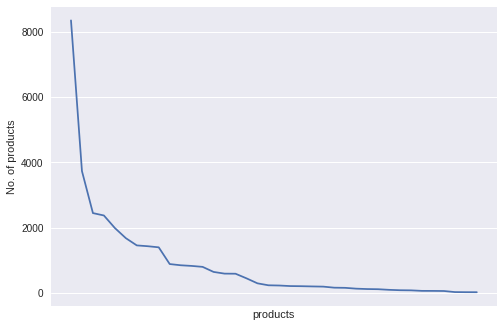

In [ ]:
import matplotlib.pyplot as plt
t = product_data.copy()
t = t.sort_values(by='Number of ratings',ascending=False)
plt.plot(t.index,t['Number of ratings'])
plt.xticks([])
plt.xlabel("products")
plt.ylabel("No. of products")
plt.show()

In [ ]:
product_data

rating  Number of ratings
product_id                                       
AV-EVZITKZqtpbFMSoqc  4.590909                 22
AVpe7xlELJeJML43ypLz  4.453594               3728
AVpf68A5ilAPnD_xkjSq  4.160000                 25
AVpfIfGA1cnluZ0-emyp  4.737705                 61
AVpflnS7ilAPnD_xehxE  4.523810                 21
AVpfpK8KLJeJML43BCuD  4.529056                826
AVpftoij1cnluZ0-p5n2  4.862069                 58
AVpfw2hvilAPnD_xh0rH  4.531026               1676
AVpgNzjwLJeJML43Kpxn  4.448214               8342
AVpgdkC8ilAPnD_xsvyi  4.494624               1395
AVph0EeEilAPnD_x9myq  4.546324               1986
AVphPmHuilAPnD_x3E5h  4.715503                587
AVpidLjVilAPnD_xEVpI  4.629268                205
AVpjEN4jLJeJML43rpUe  4.511004               1454
AVqVGWLKnnc1JgDc3jF1  4.531840               1429
AVqVGWQDv8e3D1O-ldFr  4.584388               2370
AVqVGZN9QMlgsOJE6eUZ  4.702128                 94
AVqVGZNvQMlgsOJE6eUY  4.433628                113
AVqVGZO3nnc1JgDc3jGK  4.641026                 78
AVqVGZQBQMlgsOJE6eUb  4.612903                 62
AVqVGZSEQMlgsOJE6eUc  4.558296                446
AVqkIdZiv8e3D1O-leaJ  4.515366                846
AVqkIh8WQMlgsOJE6fu-  4.555556                198
AVqkIh9HQMlgsOJE6fu_  4.526549                226
AVqkIhkhv8e3D1O-lebZ  4.576271                118
AVqkIhwDv8e3D1O-lebb  4.598494                797
AVqkIhxunnc1JgDc3kg_  4.597217               2443
AVqkIiKWnnc1JgDc3khH  4.593548                155
AVqkIj9snnc1JgDc3khU  4.569378                209
AVwjfXp4QMlgsOJE8qmk  4.630901                233
AVwjfXqqQMlgsOJE8qmm  4.641638                293
AVzNj1Y0GV-KLJ3aarCo  4.600000                160
AVzYlGj3vKc47QAVeZRH  4.607692                130
AVzYlGkFvKc47QAVeZRI  4.578709                883
AVzYlGnuGV-KLJ3abPUD  4.585366                 82
AWFUWc8THh53nbDRF6YO  4.663551                642
AWK8z0pOIwln0LfXlSxH  4.640625                192
AWMjT0WguC1rwyj_rFh3  4.749153                590

In [ ]:
item_user_matrix

reviews.username      000G  00Gambler  00JK  ...  zimm  zmax192  ztlbxx
product_id                                   ...                       
AV-EVZITKZqtpbFMSoqc   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpe7xlELJeJML43ypLz   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpf68A5ilAPnD_xkjSq   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfIfGA1cnluZ0-emyp   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpflnS7ilAPnD_xehxE   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfpK8KLJeJML43BCuD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpftoij1cnluZ0-p5n2   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfw2hvilAPnD_xh0rH   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVpgNzjwLJeJML43Kpxn   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpgdkC8ilAPnD_xsvyi   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVph0EeEilAPnD_x9myq   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVphPmHuilAPnD_x3E5h   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpidLjVilAPnD_xEVpI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpjEN4jLJeJML43rpUe   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGWLKnnc1JgDc3jF1   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVqVGWQDv8e3D1O-ldFr   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqVGZN9QMlgsOJE6eUZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZNvQMlgsOJE6eUY   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZO3nnc1JgDc3jGK   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZQBQMlgsOJE6eUb   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZSEQMlgsOJE6eUc   0.0        0.0   0.0  ...   0.0      0.0     5.0
AVqkIdZiv8e3D1O-leaJ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh8WQMlgsOJE6fu-   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh9HQMlgsOJE6fu_   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhkhv8e3D1O-lebZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhwDv8e3D1O-lebb   0.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIhxunnc1JgDc3kg_   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIiKWnnc1JgDc3khH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIj9snnc1JgDc3khU   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXp4QMlgsOJE8qmk   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXqqQMlgsOJE8qmm   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzNj1Y0GV-KLJ3aarCo   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGj3vKc47QAVeZRH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGkFvKc47QAVeZRI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGnuGV-KLJ3abPUD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AWFUWc8THh53nbDRF6YO   0.0        0.0   0.0  ...   5.0      0.0     0.0
AWK8z0pOIwln0LfXlSxH   0.0        0.0   4.0  ...   5.0      0.0     0.0
AWMjT0WguC1rwyj_rFh3   0.0        0.0   0.0  ...   0.0      0.0     0.0

[38 rows x 17299 columns]

In [ ]:
item_user_matrix

reviews.username      000G  00Gambler  00JK  ...  zimm  zmax192  ztlbxx
product_id                                   ...                       
AV-EVZITKZqtpbFMSoqc   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpe7xlELJeJML43ypLz   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpf68A5ilAPnD_xkjSq   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfIfGA1cnluZ0-emyp   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpflnS7ilAPnD_xehxE   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfpK8KLJeJML43BCuD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpftoij1cnluZ0-p5n2   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfw2hvilAPnD_xh0rH   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVpgNzjwLJeJML43Kpxn   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpgdkC8ilAPnD_xsvyi   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVph0EeEilAPnD_x9myq   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVphPmHuilAPnD_x3E5h   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpidLjVilAPnD_xEVpI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpjEN4jLJeJML43rpUe   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGWLKnnc1JgDc3jF1   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVqVGWQDv8e3D1O-ldFr   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqVGZN9QMlgsOJE6eUZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZNvQMlgsOJE6eUY   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZO3nnc1JgDc3jGK   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZQBQMlgsOJE6eUb   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZSEQMlgsOJE6eUc   0.0        0.0   0.0  ...   0.0      0.0     5.0
AVqkIdZiv8e3D1O-leaJ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh8WQMlgsOJE6fu-   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh9HQMlgsOJE6fu_   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhkhv8e3D1O-lebZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhwDv8e3D1O-lebb   0.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIhxunnc1JgDc3kg_   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIiKWnnc1JgDc3khH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIj9snnc1JgDc3khU   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXp4QMlgsOJE8qmk   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXqqQMlgsOJE8qmm   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzNj1Y0GV-KLJ3aarCo   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGj3vKc47QAVeZRH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGkFvKc47QAVeZRI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGnuGV-KLJ3abPUD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AWFUWc8THh53nbDRF6YO   0.0        0.0   0.0  ...   5.0      0.0     0.0
AWK8z0pOIwln0LfXlSxH   0.0        0.0   4.0  ...   5.0      0.0     0.0
AWMjT0WguC1rwyj_rFh3   0.0        0.0   0.0  ...   0.0      0.0     0.0

[38 rows x 17299 columns]

In [ ]:
x1 = item_user_matrix.copy()
x1.shape

(38, 17299)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10)
decomposed_matrix = svd.fit_transform(x1)
decomposed_matrix.shape

(38, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(38, 38)

In [ ]:
i = 'AVqkIhwDv8e3D1O-lebb'

product_names = list(x1.index)
product_ID = product_names.index(i)
product_ID

25

In [ ]:
corr_prod_id = correlation_matrix[product_ID]
corr_prod_id

array([ 0.3843554 , -0.22957797, -0.14840714, -0.12340893,  0.0458706 ,
       -0.28756942,  0.49462005, -0.10894085, -0.11380219, -0.1390953 ,
       -0.10751732, -0.0937672 , -0.01139576, -0.13875113, -0.10169891,
        0.48261428, -0.09986075,  0.01739053, -0.08983229, -0.09018281,
       -0.08425234, -0.14234476,  0.52456097,  0.52442156,  0.55747098,
        1.        ,  0.5756537 ,  0.50883206,  0.51888462,  0.10722365,
        0.14372317,  0.40929662, -0.05099904, -0.07048301,  0.69785922,
       -0.03929891, -0.06029004, -0.07533659])

In [ ]:
x1.index[corr_prod_id > 0.65]

Index(['AVqkIhwDv8e3D1O-lebb', 'AVzYlGnuGV-KLJ3abPUD'], dtype='object', name='product_id')

# **Classification as Hacker and Non Hacker**

In [ ]:
data_final['Ishacker'] = 0

In [ ]:
for i in range(len(data_final)):
  if data_final.at[i,'numHelpful'] >150 & data_final.at[i,'rating'] < 3 :
    data_final.at[i, 'Ishacker'] = 1 
  else :
    data_final.at[i,'Ihacker'] = 0
               

In [ ]:
data_final['Ishacker'].value_counts()

0    33213
1      105
Name: Ishacker, dtype: int64

In [ ]:
classified_data = data_final.drop(data_final[data_final['Ishacker'] > 0].index)

In [ ]:
classified_data['Ishacker'].value_counts()

0    33213
Name: Ishacker, dtype: int64

# **Recommender system after Classification**

In [ ]:
df5 = classified_data[['id','name','primaryCategories','rating','reviews.username']]
df5

id  ... reviews.username
0      AVqVGZNvQMlgsOJE6eUY  ...           llyyue
1      AVqVGZNvQMlgsOJE6eUY  ...           Charmi
2      AVqVGZNvQMlgsOJE6eUY  ...     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY  ...          Kdperry
4      AVqVGZNvQMlgsOJE6eUY  ...      Johnnyblack
...                     ...  ...              ...
33313  AVqkIhxunnc1JgDc3kg_  ...   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_  ...        fireman21
33315  AVqkIhxunnc1JgDc3kg_  ...   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_  ...           SandyJ
33317  AVqkIhxunnc1JgDc3kg_  ...             Hung

[33213 rows x 5 columns]

In [ ]:
df5.isnull().sum()

id                   0
name                 0
primaryCategories    0
rating               0
reviews.username     0
dtype: int64

In [ ]:
df5.columns = ['product_id','product_name','primaryCategories','rating','reviews.username']

In [ ]:
product_details = df5[['product_id','product_name','primaryCategories']]
product_details = product_details.drop_duplicates(subset = ['product_id'])
product_details.shape

(68, 3)

In [ ]:
## nan values in rating columns is not acceptable so we remove that
product_data = pd.DataFrame(df5.groupby('product_id')['rating'].mean())
product_data['Number of ratings'] = df5.groupby('product_id')['rating'].count().values
product_data

rating  Number of ratings
product_id                                       
AV-ETMhgYSSHbkXwpNb9  4.750000                  4
AV-EVZITKZqtpbFMSoqc  4.590909                 22
AV-XeQLWuC1rwyj_gbP5  5.000000                  3
AV2ElNnuvKc47QAVouhY  4.000000                  1
AVpe5Q3sLJeJML43xt5X  5.000000                  1
...                        ...                ...
AWMjXUGdHh53nbDRJ9LA  4.333333                  3
AWP6zKOtIwln0LfXnf2p  4.428571                  7
AWYAV-i9Iwln0LfXqrUq  4.500000                  2
AWdDioCIHh53nbDRScLV  5.000000                  2
AWdDlIX9Hh53nbDRSc-U  5.000000                  7

[68 rows x 2 columns]

In [ ]:
product_data.describe()

rating  Number of ratings
count  68.000000          68.000000
mean    4.619646         488.426471
std     0.291348        1197.699528
min     3.500000           1.000000
25%     4.523457           4.750000
50%     4.613570          59.000000
75%     4.770000         331.250000
max     5.000000        8342.000000

In [ ]:
product_data = product_data[product_data['Number of ratings'] >= 20]
product_data

rating  Number of ratings
product_id                                       
AV-EVZITKZqtpbFMSoqc  4.590909                 22
AVpe7xlELJeJML43ypLz  4.453594               3728
AVpf68A5ilAPnD_xkjSq  4.160000                 25
AVpfIfGA1cnluZ0-emyp  4.737705                 61
AVpflnS7ilAPnD_xehxE  4.523810                 21
AVpfpK8KLJeJML43BCuD  4.533333                825
AVpftoij1cnluZ0-p5n2  4.862069                 58
AVpfw2hvilAPnD_xh0rH  4.536163               1673
AVpgNzjwLJeJML43Kpxn  4.448214               8342
AVpgdkC8ilAPnD_xsvyi  4.522399               1384
AVph0EeEilAPnD_x9myq  4.555275               1981
AVphPmHuilAPnD_x3E5h  4.748276                580
AVpidLjVilAPnD_xEVpI  4.647059                204
AVpjEN4jLJeJML43rpUe  4.535319               1444
AVqVGWLKnnc1JgDc3jF1  4.537868               1426
AVqVGWQDv8e3D1O-ldFr  4.591121               2365
AVqVGZN9QMlgsOJE6eUZ  4.802198                 91
AVqVGZNvQMlgsOJE6eUY  4.495495                111
AVqVGZO3nnc1JgDc3jGK  4.760000                 75
AVqVGZQBQMlgsOJE6eUb  4.700000                 60
AVqVGZSEQMlgsOJE6eUc  4.558296                446
AVqkIdZiv8e3D1O-leaJ  4.527877                843
AVqkIh8WQMlgsOJE6fu-  4.610256                195
AVqkIh9HQMlgsOJE6fu_  4.573991                223
AVqkIhkhv8e3D1O-lebZ  4.576271                118
AVqkIhwDv8e3D1O-lebb  4.605031                795
AVqkIhxunnc1JgDc3kg_  4.604432               2437
AVqkIiKWnnc1JgDc3khH  4.616883                154
AVqkIj9snnc1JgDc3khU  4.621359                206
AVwjfXp4QMlgsOJE8qmk  4.658009                231
AVwjfXqqQMlgsOJE8qmm  4.641638                293
AVzNj1Y0GV-KLJ3aarCo  4.679487                156
AVzYlGj3vKc47QAVeZRH  4.635659                129
AVzYlGkFvKc47QAVeZRI  4.593857                879
AVzYlGnuGV-KLJ3abPUD  4.585366                 82
AWFUWc8THh53nbDRF6YO  4.694969                636
AWK8z0pOIwln0LfXlSxH  4.659686                191
AWMjT0WguC1rwyj_rFh3  4.749153                590

In [ ]:
matrix_df = df5[['product_id','rating','reviews.username']]
matrix_df

product_id  rating reviews.username
0      AVqVGZNvQMlgsOJE6eUY       3           llyyue
1      AVqVGZNvQMlgsOJE6eUY       5           Charmi
2      AVqVGZNvQMlgsOJE6eUY       4     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY       5          Kdperry
4      AVqVGZNvQMlgsOJE6eUY       5      Johnnyblack
...                     ...     ...              ...
33313  AVqkIhxunnc1JgDc3kg_       5   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_       4        fireman21
33315  AVqkIhxunnc1JgDc3kg_       5   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_       5           SandyJ
33317  AVqkIhxunnc1JgDc3kg_       4             Hung

[33213 rows x 3 columns]

In [ ]:
matrix_df = matrix_df[matrix_df['product_id'].isin(product_data.index)]
matrix_df

product_id  rating reviews.username
0      AVqVGZNvQMlgsOJE6eUY       3           llyyue
1      AVqVGZNvQMlgsOJE6eUY       5           Charmi
2      AVqVGZNvQMlgsOJE6eUY       4     johnnyjojojo
3      AVqVGZNvQMlgsOJE6eUY       5          Kdperry
4      AVqVGZNvQMlgsOJE6eUY       5      Johnnyblack
...                     ...     ...              ...
33313  AVqkIhxunnc1JgDc3kg_       5   Mom2twinsplus1
33314  AVqkIhxunnc1JgDc3kg_       4        fireman21
33315  AVqkIhxunnc1JgDc3kg_       5   suzannalicious
33316  AVqkIhxunnc1JgDc3kg_       5           SandyJ
33317  AVqkIhxunnc1JgDc3kg_       4             Hung

[33080 rows x 3 columns]

In [ ]:
pivot_df = matrix_df.pivot_table(index='reviews.username',columns='product_id',values='rating').fillna(0)
pivot_df

product_id        AV-EVZITKZqtpbFMSoqc  ...  AWMjT0WguC1rwyj_rFh3
reviews.username                        ...                      
000G                               0.0  ...                   0.0
00Gambler                          0.0  ...                   0.0
00JK                               0.0  ...                   0.0
1-Apr                              0.0  ...                   0.0
1000011                            0.0  ...                   0.0
...                                ...  ...                   ...
zetyk                              0.0  ...                   0.0
ziggy24                            0.0  ...                   0.0
zimm                               0.0  ...                   0.0
zmax192                            0.0  ...                   0.0
ztlbxx                             0.0  ...                   0.0

[17264 rows x 38 columns]

In [ ]:
item_user_matrix = matrix_df.pivot_table(index='product_id',columns='reviews.username',values='rating').fillna(0)
item_user_matrix

reviews.username      000G  00Gambler  00JK  ...  zimm  zmax192  ztlbxx
product_id                                   ...                       
AV-EVZITKZqtpbFMSoqc   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpe7xlELJeJML43ypLz   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpf68A5ilAPnD_xkjSq   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfIfGA1cnluZ0-emyp   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpflnS7ilAPnD_xehxE   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfpK8KLJeJML43BCuD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpftoij1cnluZ0-p5n2   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpfw2hvilAPnD_xh0rH   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVpgNzjwLJeJML43Kpxn   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpgdkC8ilAPnD_xsvyi   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVph0EeEilAPnD_x9myq   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVphPmHuilAPnD_x3E5h   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpidLjVilAPnD_xEVpI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVpjEN4jLJeJML43rpUe   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGWLKnnc1JgDc3jF1   0.0        0.0   0.0  ...   0.0      5.0     0.0
AVqVGWQDv8e3D1O-ldFr   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqVGZN9QMlgsOJE6eUZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZNvQMlgsOJE6eUY   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZO3nnc1JgDc3jGK   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZQBQMlgsOJE6eUb   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqVGZSEQMlgsOJE6eUc   0.0        0.0   0.0  ...   0.0      0.0     5.0
AVqkIdZiv8e3D1O-leaJ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh8WQMlgsOJE6fu-   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIh9HQMlgsOJE6fu_   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhkhv8e3D1O-lebZ   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIhwDv8e3D1O-lebb   0.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIhxunnc1JgDc3kg_   5.0        5.0   0.0  ...   0.0      0.0     0.0
AVqkIiKWnnc1JgDc3khH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVqkIj9snnc1JgDc3khU   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXp4QMlgsOJE8qmk   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVwjfXqqQMlgsOJE8qmm   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzNj1Y0GV-KLJ3aarCo   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGj3vKc47QAVeZRH   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGkFvKc47QAVeZRI   0.0        0.0   0.0  ...   0.0      0.0     0.0
AVzYlGnuGV-KLJ3abPUD   0.0        0.0   0.0  ...   0.0      0.0     0.0
AWFUWc8THh53nbDRF6YO   0.0        0.0   0.0  ...   5.0      0.0     0.0
AWK8z0pOIwln0LfXlSxH   0.0        0.0   4.0  ...   5.0      0.0     0.0
AWMjT0WguC1rwyj_rFh3   0.0        0.0   0.0  ...   0.0      0.0     0.0

[38 rows x 17264 columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix

feature_matrix=csr_matrix(item_user_matrix)
print(feature_matrix)

  (0, 400)	5.0
  (0, 9735)	5.0
  (0, 9879)	4.0
  (0, 9972)	5.0
  (0, 10078)	5.0
  (0, 10380)	4.0
  (0, 10780)	5.0
  (0, 10824)	5.0
  (0, 11187)	5.0
  (0, 12788)	5.0
  (0, 12882)	5.0
  (0, 12994)	2.0
  (0, 13505)	5.0
  (0, 13954)	4.0
  (0, 14650)	5.0
  (0, 14687)	5.0
  (0, 14971)	5.0
  (0, 15869)	5.0
  (0, 16100)	4.0
  (0, 16298)	4.0
  (0, 16542)	5.0
  (0, 16848)	4.0
  (1, 949)	4.0
  (1, 953)	5.0
  (1, 955)	5.0
  :	:
  (37, 16737)	4.0
  (37, 16744)	5.0
  (37, 16750)	5.0
  (37, 16758)	5.0
  (37, 16786)	5.0
  (37, 16859)	5.0
  (37, 16890)	5.0
  (37, 16909)	4.0
  (37, 17017)	5.0
  (37, 17018)	5.0
  (37, 17047)	5.0
  (37, 17069)	5.0
  (37, 17083)	5.0
  (37, 17090)	5.0
  (37, 17097)	5.0
  (37, 17101)	5.0
  (37, 17110)	5.0
  (37, 17118)	5.0
  (37, 17141)	5.0
  (37, 17156)	5.0
  (37, 17164)	5.0
  (37, 17201)	5.0
  (37, 17213)	5.0
  (37, 17230)	5.0
  (37, 17236)	4.0


In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(item_user_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [ ]:
test1_prod = item_user_matrix.loc['AVqVGWQDv8e3D1O-ldFr',:].values
test1_prod = test1_prod.reshape(-1,1)
test1_prod.shape

(17264, 1)

In [ ]:
def recommandedForProduct(prod_id):
    recomm_products = pivot_df.corrwith(pivot_df[prod_id]).sort_values(ascending=False)[:10]
    t_data = product_details[product_details['product_id'].isin(recomm_products.index)].copy()
    t_data['corr'] = t_data['product_id'].apply(lambda x : recomm_products[x])
    t_data = t_data.sort_values(by='corr',ascending=False)
    return t_data

recommandedForProduct("AVqVGWQDv8e3D1O-ldFr")

product_id  ...      corr
18372  AVqVGWQDv8e3D1O-ldFr  ...  1.000000
30875  AVqkIhxunnc1JgDc3kg_  ...  0.810716
3410   AVqkIhwDv8e3D1O-lebb  ...  0.448439
1606   AVqkIhkhv8e3D1O-lebZ  ...  0.165092
4788   AVqkIh8WQMlgsOJE6fu-  ...  0.009688
4696   AVqkIj9snnc1JgDc3khU  ...  0.006509
1620   AVqkIh9HQMlgsOJE6fu_  ...  0.002219
27691  AV-EVZITKZqtpbFMSoqc  ...  0.002070
4793   AVqkIiKWnnc1JgDc3khH  ...  0.001402
4749   AVqVGZN9QMlgsOJE6eUZ  ... -0.000542

[10 rows x 4 columns]

In [ ]:
results = pivot_df.corrwith(pivot_df['AVqVGWQDv8e3D1O-ldFr'])
t = results.sort_values(ascending=False)[:10]
t_data = product_details[product_details['product_id'].isin(t.index)].copy()
t_data['corr'] = t_data['product_id'].apply(lambda x : t[x])
t_data

product_id  ...      corr
1606   AVqkIhkhv8e3D1O-lebZ  ...  0.165092
1620   AVqkIh9HQMlgsOJE6fu_  ...  0.002219
3410   AVqkIhwDv8e3D1O-lebb  ...  0.448439
4696   AVqkIj9snnc1JgDc3khU  ...  0.006509
4749   AVqVGZN9QMlgsOJE6eUZ  ... -0.000542
4788   AVqkIh8WQMlgsOJE6fu-  ...  0.009688
4793   AVqkIiKWnnc1JgDc3khH  ...  0.001402
18372  AVqVGWQDv8e3D1O-ldFr  ...  1.000000
27691  AV-EVZITKZqtpbFMSoqc  ...  0.002070
30875  AVqkIhxunnc1JgDc3kg_  ...  0.810716

[10 rows x 4 columns]

In [ ]:
def recommandedProductsForYou(p_id):
    distances , indices = model_knn.kneighbors([item_user_matrix.loc[p_id,:].values],n_neighbors=3)
    for i in range(0,len(indices.flatten())):
        p_id1 = item_user_matrix.index[indices.flatten()[i]]
        prod_details1 = product_details[product_details['product_id']==p_id1]['product_name'].values[0]
        if i==0:
            print(f"recommanded for you is  {prod_details1}")
        else:
            print(f"{i} : {prod_details1} with distance {distances.flatten()[i]}")

In [ ]:
## using scratch method
recommandedProductsForYou("AVqVGWQDv8e3D1O-ldFr")

recommanded for you is  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black
1 : Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers with distance 0.1652526579528727
2 : All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta with distance 0.5161736751817889


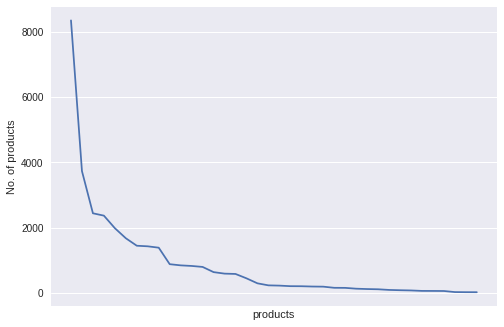

In [ ]:
import matplotlib.pyplot as plt
t = product_data.copy()
t = t.sort_values(by='Number of ratings',ascending=False)
plt.plot(t.index,t['Number of ratings'])
plt.xticks([])
plt.xlabel("products")
plt.ylabel("No. of products")
plt.show()

In [ ]:
product_data

rating  Number of ratings
product_id                                       
AV-EVZITKZqtpbFMSoqc  4.590909                 22
AVpe7xlELJeJML43ypLz  4.453594               3728
AVpf68A5ilAPnD_xkjSq  4.160000                 25
AVpfIfGA1cnluZ0-emyp  4.737705                 61
AVpflnS7ilAPnD_xehxE  4.523810                 21
AVpfpK8KLJeJML43BCuD  4.533333                825
AVpftoij1cnluZ0-p5n2  4.862069                 58
AVpfw2hvilAPnD_xh0rH  4.536163               1673
AVpgNzjwLJeJML43Kpxn  4.448214               8342
AVpgdkC8ilAPnD_xsvyi  4.522399               1384
AVph0EeEilAPnD_x9myq  4.555275               1981
AVphPmHuilAPnD_x3E5h  4.748276                580
AVpidLjVilAPnD_xEVpI  4.647059                204
AVpjEN4jLJeJML43rpUe  4.535319               1444
AVqVGWLKnnc1JgDc3jF1  4.537868               1426
AVqVGWQDv8e3D1O-ldFr  4.591121               2365
AVqVGZN9QMlgsOJE6eUZ  4.802198                 91
AVqVGZNvQMlgsOJE6eUY  4.495495                111
AVqVGZO3nnc1JgDc3jGK  4.760000                 75
AVqVGZQBQMlgsOJE6eUb  4.700000                 60
AVqVGZSEQMlgsOJE6eUc  4.558296                446
AVqkIdZiv8e3D1O-leaJ  4.527877                843
AVqkIh8WQMlgsOJE6fu-  4.610256                195
AVqkIh9HQMlgsOJE6fu_  4.573991                223
AVqkIhkhv8e3D1O-lebZ  4.576271                118
AVqkIhwDv8e3D1O-lebb  4.605031                795
AVqkIhxunnc1JgDc3kg_  4.604432               2437
AVqkIiKWnnc1JgDc3khH  4.616883                154
AVqkIj9snnc1JgDc3khU  4.621359                206
AVwjfXp4QMlgsOJE8qmk  4.658009                231
AVwjfXqqQMlgsOJE8qmm  4.641638                293
AVzNj1Y0GV-KLJ3aarCo  4.679487                156
AVzYlGj3vKc47QAVeZRH  4.635659                129
AVzYlGkFvKc47QAVeZRI  4.593857                879
AVzYlGnuGV-KLJ3abPUD  4.585366                 82
AWFUWc8THh53nbDRF6YO  4.694969                636
AWK8z0pOIwln0LfXlSxH  4.659686                191
AWMjT0WguC1rwyj_rFh3  4.749153                590